# 회귀분석

Last updated 20190902MON1200
todo: local regression 

## 목차

* 문제의 이해
* 회귀식
* 간단한 예제
* 알고리즘 -> OLS를 최소화하는 계수를 푸는 것으로 대신
* OLS 대안
* 성능
* 사례

(참조 ISLR 6장)

## 문제의 이해

어떤 값을 예측한다고 하고, 그 값에 영향을 미치는 변수들이 있다고 하자.
이런 경우, 예측 값을 **출력변수 Output variables** 또는 **목표변수 Target variables**라고 하고,
영향변수를 **입력변수 Input variables**라고 한다.
예를 들어, 영화매출을 예측한다고 하자. 매출에 영향을 미칠 수 있는 변수로 평점, 광고비, 투자비, 개봉일 매출액, 조회수 등을 꼽을 수 있다.
회귀분석은 입력변수로 부터 목표 값을 예측을 하는 문제에 사용한다.

## 회귀식

### 변수
변수는 크게 나누어 **숫자**, **문자** 값으로 구분할 수 있다.
숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 크거나 작은 의미가 있다.
**순위변수 Ordinal variable**은 어떤 범주에 속하여 그 범주의 이름을 말한다.
초등학고, 중학교, 고등학교, 대학교가 하나의 예이다.
소득수준을 차상위, 중위, 상위로 구분하면 순위변수에 해당된다.
여기서 범주를 등간격으로 간격변수 **Internal variable**이라고 한다.
자신의 느낌을 좋다 보통 안좋다로 범주화하는 경우이다.

명목변수 Categorical or nominal varaible는 남녀 성별과 같이 순서가 없이 이름이 있는 변수를 말한다.

자동차 색과 같이 검은색, 흰색, 파란색이 예가 된다.

### 입력변수의 수에 따른 구분

회귀식은 **입력변수에 대해 영향을 미치는 가중치를 주어 출력변수 값을 계산하는 식**이라고 할 수 있다.
출력변수는 숫자이고 입력변수는 하나 이상이 될 수 있다.

상관관계와 회귀분석은 여러 변수간의 관계를 분석하는 방법이란 공통점이 있다.
반면에 **상관관계**는 변수 간 관계의 강도를 -1 ~ 1 값으로 측정하는 것이고, **회귀분석**에서는 종속변수와 독립변수를 구분하여 설명하거나, 예측하는데 쓰인다.

입력변수에 따라 이진, 다중회귀분석으로 구분할 수 있다.
다중회귀식 multiple regression은 변인이 복수인 경우를 말한다.
변수가 많으면 변수를 추가하는 순서에 따라 회귀식을 도출할 수 있다.
모든 변수를 한꺼번에 넣거나, 순서를 정해서 하거나 (stepwise), 또는 순서를 정하지만, 먼저 넣어야할 변수와 아닌 경우로 계층화해서 (고기류는 먼저 넣고, 야채는 나중에) hierachical 방식으로 할 수 있다.

### 표준화에 따른 구분

비표준화된 회귀식 unstandardized regression equation은 원래 데이터를 그대로 사용하기 때문에 직관적으로 이해할 수 있다.

$$ Y = a + bX $$

그러나 표준화된 standardized regression equation: 원시값(raw data)를 사용하는 것이 아니라 z값을 사용할 수 있다.

$$ z_y = \beta z_x $$

### general linear model

y가 여러 변수의 선형적 관계의 모델을 말하는데, 이 때 오류 residuals가 **정규분포**를 따르는 경우를 말한다.
에러 $\epsilon_i \sim N(0,\sigma^2)$

$$ y_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi} + \epsilon_i $$


> GLM 

> 일반화선형모델 (GLM: generalized linear model)은 입력변수와 예측변수를 선형관계로 모형화한다.
그러나 오류 Residuals가 정규분포를 따르지 않는 경우, 연결함수 link function을 통해 비정규화를 줄이려고 한다.
정규화가 아닌 분포는 여러 형태가 있을 수 있다. 이항 binomial, 포아손 Poisson, 베타 beta, 감마 gamma 등을 예를 들 수 있다.
종속변수가 이항분포인 경우 로지스틱을, 종속변수가 갯수인 경우 poisson으로 모델링한다.
generalized라는 단어는 선형, 로지스틱, 포아손을 **일반화 generalized**한 모델이라 그렇게 명명되었다.

$\eta_i = \beta_0 + \beta_1 x_{1i} + ... + \beta_p x_{pi}$

In [ ]:
dummy variables - categorical independent variables를 말함 (예: 성별, 학위구분)

## 간단한 예제 풀기

x | y
-----|-----
1 | 6
2 | 5
3 | 7
4 | 10

### 데이터

x,y 데이터를 생성해보자.

In [101]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

### 그래프

```scatter(x,y)```로 각 좌표(x,y)를 나타내보자.

```subplot()```에는 3개의 인자가 사용된다.
* 행, 열, 순서 (왼쪽 상단 1부터 시작해서 오른쪽으로 이동). 즉 **211은 2행 1열의 첫째**, **212는 2행 1열의 둘째**를 의미한다.

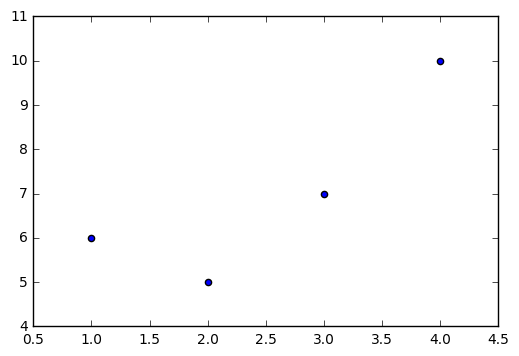

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

### 선형 회귀식 풀기

아래 식이 성립한다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위 식을 모두 더해서 총오류를 구하면:

$f=210 + 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1$

위를 편미분하면:

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

이를 풀면:

$\beta_0 = 3.5$

$\beta_1 = 1.4$

예측 값 $\hat{y}$를 계산해보자.

각 x 값에 기울기 1.4를 곱하고, y절편 3.5를 더해서 구할 수 있다.

$yhat=3.5 + 1.4 x$

x는 벡터 값으로 요소별 '$x \times 1.4 + 3.5$'와 같이 덧셈, 곱셈이 가능하다.

In [114]:
yhat=x*1.4+3.5
print(yhat)

[ 4.9  6.3  7.7  9.1]


실제값과 예측값의 오류를 구해보자

In [118]:
yhat-y

array([-1.1,  1.3,  0.7, -0.9])

오류는 플러스, 마이너스 서로 상쇄될 수 있다. 오류의 제곱을 구하면 크기를 올바르게 알 수 있다.

In [117]:
np.sum(np.power(yhat-y,2))

4.1999999999999984

### R2

TSS (Total Sum of Squared Errors ) = SSE (Sum of squared errors) + SSR (Residual Sum of squared errors)

$r^2=\frac{SSR}{TSS}$

### Python으로 미분해서 풀어보자

편미분 partial derivatives은 변수 가운데 하나를 선정하고 나머지는 상수로 보고 미분하는 것이다.
예를 들어, 

$
f(x,y) = x^2 + xy + y^2\\
\frac{\partial{f}}{\partial{x}} = 2x + y
$

이를 Python sympy를 사용하면 편미분을 풀 수 있다.
```symbols('b0,b1')```는 따옴표 안의 b0,b1을 변수로 선언한다.
f함수를 b0, b1에 대해 미분을 해보자.

In [ ]:
# differentiation
import sympy as sp
b0,b1=sp.symbols('b0 b1')

diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어이다.
diff(f,b1)는 f함수를 b1에 대해서 미분하는 명령어이다.

In [107]:
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)


이를 ```solve()```로 풀면 해를 구할 수 있다.
그리고 b0, b1을 구하면 위에서 구한 값과 동일한 결과가 나온다.

In [108]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


## OLS Ordinary Least Square

* 선형회귀모델은 OLS (ordinary least squares)를 최소화하여 만든다. 즉 예측값과 실제값 차이의 제곱을 최소화한다.
* 변수가 증가할수록 overfitting (bias는 감소하지만, variance는 증가)
* 예를 들어 변수의 갯수(p)가 데이터 수(n) 보다 많아지게 되면, variance가 무한대로 증가
* 이럴 경우, shrinkage 방식으로 모델의 variance를 줄이고, 정확성을 향상


### matrix inverse method

$2x_1 - 4x_2 = 8$

$3x_1 + 6x_2 = 9$

x=[[2,4],[4,-5]]

y=[8,9]

위 식을 행렬로 나타내면,
$\beta \times x = y$

양변에 $x^{-1}$를 곱하면 아래 식이 된다.

$x^{-1}\times x\times \beta=x^{-1}\times y$

inverse에 원래의 벡터를 곱하면 identity matrix가 된다.

즉 $x^{-1}\times x=1$이므로

아래와 같이 $\beta$를 구할 수 있다.

$\beta=x^{-1}\times y$

In [34]:
import numpy as np
np.set_printoptions(suppress=True)
x=[[2,-4],[3,6]]
xT = np.linalg.inv(x) 
print "x: \n", x
print "x inv: \n", xT 
print "identity matrix 'x * xT': \n", np.dot(x,xT)

x: 
[[2, -4], [3, 6]]
x inv: 
[[ 0.25        0.16666667]
 [-0.125       0.08333333]]
identity matrix 'x * xT': 
[[ 1.  0.]
 [ 0.  1.]]


위 x*xT는 1, 즉 identity matrix가 된다.

In [33]:
import numpy as np
print np.eye(2)

[[ 1.  0.]
 [ 0.  1.]]


In [35]:
print np.eye(2) == np.dot(x,xT)

[[ True  True]
 [ True  True]]


In [37]:
print np.dot(x,xT) == np.identity(2)

[[ True  True]
 [ True  True]]


In [38]:
# matrix inverse
A=np.mat([[2,3],[4,5]])
print "A={0}\nA.I={1}".format(A,A.I) #([[-2.5, 1.5], [ 2. , -1. ]])
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
print left*right #array([-2.5,  1.5,  2. , -1. ])

A=[[2 3]
 [4 5]]
A.I=[[-2.5  1.5]
 [ 2.  -1. ]]
[-2.5  1.5  2.  -1. ]


matrix inverse method를 풀어보자.
numpy array로 행렬을 선언하고,
다음 식을 ```np.dot()```, ```np.linalg.inv()``` 함수를 이용해서 풀면 x1, x2를 구할 수 있다.

$\beta=x^{-1}\times y$

$
2 \times w1 - 4 \times w2 = 8\\
3 \times w2 + 6 \times w2 = 9
$

In [7]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

In [9]:
xT=np.linalg.inv(x)

In [10]:
w1,w2=np.dot(xT,y)
print(w1,w2)

(3.5, -0.25)


위에서 구한 값을 대입해서 식을 풀어보자

In [15]:
print 2*w1+(-4)*w2
print 3*w1+6*w2

8.0
9.0


```numpy.linalg.solve()```는 선형 벡터 식을 풀 수 있다

위의 x,y를 넣으면 값을 구할 수 있다.

In [12]:
print np.linalg.solve(x,y)

[ 3.5  -0.25]


### matrix inverse로 회귀식 풀기

* x: 입력데이터 $\in \mathbb{R}^{m \times n}$
* y: 종속변수로서, 1개의 클래스 값을 가진다.
    * $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_i \end{pmatrix}$
* $x_n,y_n=(x_1,y_1),(x_2,y_2) \ldots,(x_n,y_n)$: 학습데이터
$$y = \beta_0 + \beta_1x_1 + \ldots + \beta_nx_n
 = \beta_0 + \sum_{j=1}^n \beta_j x_j$$
* 이 식에서 $\beta_0$는 $x_0=1$인 경우 (최소화에 영향을 미치지 않으므로 제거해도 무방), $\beta$를 w로, y=wx
* $\hat{w} = argmin_{w} (y-wx)^2$ 오류를 최소화 하는 $\hat{w}$를 찾음.

* 표기법
    * $x_{ij}$는 i번째 샘플(행)의 j번째 속성(열) (또는 m행,n열로 표기하기도 한다.)
        * numpy 표기와  일치
            * 행 --> numpy x[i]
            * 열 --> numpy x[:,j]
            * 예 $x_{02}$는 1번째 행(레코드), 3번째 컬럼(속성) --> numpy x[0,2]
    * superscript, subscript를 이용하여 표기하기도 한다. $x^{(j)}_i$
        * "**Up**per indices go **up** to down; **l**ower indices go **l**eft to right" (Einstein notation from wiki)
        * superscript (j) for the j번째 열
        * subscript (i) for the  i번째 행

$\hat{w}$ 최소해를 구하면:
* e = sum of squared residuals
* $e.T \times e = (y-wx)^T (y-wx) = y^Ty -2w(x^Ty)^T+w^Tx^Twx$
* 위를 미분하면 $\frac{\partial f}{\partial w} =
    -2(x^Ty) + (x^Tx+(x^Tx)^T)w=-2(x^Ty)+2wx^Tx$
* 미분 값을 0으로 놓고 풀면, $-2x^Ty + 2\hat{w}x^Tx = 0$
* $\hat{w} = (X^T X) ^{-1} X^T y$
    * inverse matrix: $xx^{-1}=I$인 $x^{-1}$가 존재하면 x는 invertible이라고 함.
    * $y = wx$인 경우, 양변을 $x^{-1}$로 곱하면
    * $x^{-1}y = wx^{-1}x$ 여기서 $xx^{-1}=1$이므로 
    * $w=x^{-1}y$

예제
* x데이터 형식 - 첫째 열 x0, 둘째 열 x1
* 따라서 ws를 구하면 w0, w1을 반환
* y=3.0 + 1.7x

```x.T*x```를 구해보자.
numpy array **1d**는 ```[...,...,...]``` 형식으로 구성된다.
1d는 transpose를 해도 1d로 변환이 되지 않는다.
이럴 경우 ```[[],[]]```로 만들어 trasnpose해야 한다.

numpy array에 ```[]```를 추가해서 ```[[],[]]```으로 변환해준다.
또는 asmatrix() 함수를 사용하여 array 1d를 2d인 matrix로 변환한다.
```python
np.array([[1,2,3,4]])
np.asmatrix([1,2,3,4])
```

그 결과 [1,2,3,4]가 ([[1],[2],[3],[4]])로 변환이 된다.

앞서 사용했던 데이터를 활용한다.

In [19]:
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [26]:
x=np.array([x,np.ones(len(x))])

In [30]:
print x.shape,x.T.shape

(2, 4) (4, 2)


In [28]:
np.dot(x,x.T)

array([[ 30.,  10.],
       [ 10.,   4.]])

In [31]:
np.linalg.inv(np.dot(x,x.T))

array([[ 0.2, -0.5],
       [-0.5,  1.5]])

> singular matrix
> 위 결과는 singular matrix이다.
1d matrix를 자신의 transpose로 곱하면 singular matrix가 된다.
첫째 행의 2배, 3배, 4배로 행이 구성되어 실제 1행만이 독립적인 값을 가지고 있다.
singlular matrix의 inverse()는 할 수 없다.
다음과 같은 singular matrices는 inv() 연산을 할 수 없다.
```python
np.linalg.inv(np.array([[3,5],[6,10]]))
```

자신에게 자신의 Transpose를 곱한 결과이다.
그 결과는 singular matrx이다.
이 의미는 가역행렬이 아니라는 의미이다. 즉 inverse를 할 수 없다.
해가 없거나, 여러 개가 있다는 의미이다.
```np.linalg.inv(singular maxtrix)```는 오류가 난다.

단, ```np.linalg.lstsq()```는 그 중 **최소자승법에 따라 가장 적합한 해**를 구해준다.

In [32]:
np.linalg.inv(x.T*x)

ValueError: operands could not be broadcast together with shapes (4,2) (2,4) 

## numpy로 계산해보자

데이터는 위 연습에서 사용했던 데이터를 그대로 사용하자.
앞서 가역행렬의 문제로 풀 수 없던 문제를 numpy 최소자승법으로 풀어보자.

식을 y = wx로 다시 쓸 수 있다.

$6 = \beta_0 + \beta_1 \times 1$

$5 = \beta_0 + \beta_1 \times 2$

$7 = \beta_0 + \beta_1 \times 3$

$10 = \beta_0 + \beta_1 \times 4$


In [2]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

주의할 점은 x를 [x 1]로 변환한다는 점이다. 절편 값을 구하기 위해서 그렇게 해야 한다.

아래 데이터는 w1, w0을 각 행으로 구성하고 있다.

```python
[ 1.  1.]
[ 2.  1.]
[ 3.  1.]
[ 4.  1.]
```

$6 = \beta_1 \times 1 + \beta_0 \times 1$

$5 = \beta_1 \times 2 + \beta_0 \times 1$

$7 = \beta_1 \times 3 + \beta_0 \times 1$

$10 = \beta_1 \times 4 + \beta_0 \times 1$

In [3]:
x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]


x (4,2), x.T (2,4)의 dot()을 구하면 (4,4)
순서를 바꾸면 x.T (2,4) x (4,2) -> (2,2)이 된다.

In [5]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

('xTx=', array([[ 30.,  10.],
       [ 10.,   4.]]))


In [6]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 0.2, -0.5],
       [-0.5,  1.5]]))


In [9]:
xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

('xTyT=', array([ 77.,  28.]))


In [10]:
print("weights=",np.dot(xTxI,xTyT))

('weights=', array([ 1.4,  3.5]))


In [11]:
np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

array([ 1.4,  3.5])

```numpy.linalg.lstsq()```에는 컬럼벡터 x를 적어준다.
그 결과는 앞서 계산값과 일치한다.

함수의 입력을 적어준다.
* 독립변수 ```x```
* 종속변수 ```y```

그 반환 값은 가중치 weights이다. 독립변수 각 각에 대한 가중치이다.
$y=w_1\times x + w_0$ 순서대로 출력한다.

In [43]:
np.warnings.filterwarnings('ignore')   #suppress numpy warnings
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([ 1.40,  3.50]), array([ 4.20]), 2, array([ 5.78,  0.77])))


w0,w1는 위에서 풀었던 해와 동일하게 계산된다.


In [42]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000006, '\nw0=', 3.4999999999999978)


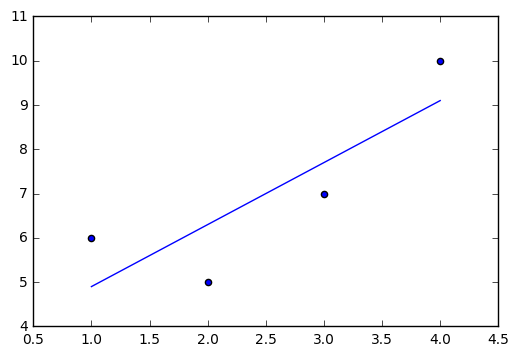

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)

## 간단한 예제 2

w0, w1으로 A를 구성해보자.

In [28]:
import numpy as np
x1=np.array([[1,2],[1,4],[1,6]])
y1=np.array([3,6,7])

In [29]:
print(x1.shape,y1.shape)

((3, 2), (3,))


주의할 점은 이번에는 1 컬럼의 순서가 뒤바뀌었다.

In [30]:
print x1

[[1 2]
 [1 4]
 [1 6]]


* ```X.T*X```는 array는 ```dot()```함수로 연산을 한다.
* 그 값의 inverse를 구한다.
* ```X.T*Y``` 역시 array는 ```dot()```함수로 연산을 한다.

In [31]:
xTx=np.dot(x1.T,x1)
print("xTx=",xTx)

('xTx=', array([[ 3, 12],
       [12, 56]]))


In [32]:
xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

('xTxI=', array([[ 2.33333333, -0.5       ],
       [-0.5       ,  0.125     ]]))


In [33]:
xTyT=np.dot(x1.T,y1)
print("xTyT=",xTyT)

('xTyT=', array([16, 72]))


마직막으로 원하는 입력변수의 가중치를 구할 수 있게 된다.
입력 컬럼에 해당하는 가중치 $y= w_0 \times x_0 + w_1\times x_1$ 순서대로 출력한다.

즉, $w_0$은 첫째 컬럼인 절편 $x_0$, $w_1$은 둘째 컬럼인 $x_1$에 대한 계수이다.

print("weights=",np.dot(xTxI,xTyT))

In [35]:
np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y1))

array([ 1.33333333,  1.        ])

In [93]:
w0, w1 = np.linalg.lstsq(x1, y1)[0]
print(w0,w1)

(1.3333333333333306, 1.0000000000000004)


### 오류 계산

아래는 연산을 요소별로 계산하고 있다.
numpy는 소수점을 정밀도 그대로 출력한다.

In [94]:
print "i  error       ","y       ","pred    "
print "-- ------------","--------","--------"
for i in range(len(x1)):
  predicted=w0*x1[i][0] + w1*x1[i][1]
  error=y1[i]-predicted
  print("{:2d} {}={}-{:.2f}".format(i,error,y1[i],predicted))

i  error        y        pred    
-- ------------ -------- --------
 0 -0.333333333333=3-3.33
 1 0.666666666667=6-5.33
 2 -0.333333333333=7-7.33


벡터로 계산해보자.
우선 w를 array로 만들어 준다.

In [104]:
w=np.array([w0,w1])

x1,w의 ```dot()``` 연산을 하기 위해 차원을 맞추어 준다.

In [105]:
x1.shape,w.shape

((3, 2), (2,))

In [106]:
w=w[:,np.newaxis]
print w.shape
print w

(2, 1)
[[ 1.33]
 [ 1.  ]]


dot()연산으로 예측치를 출력할 수 있다.

In [102]:
pred=np.dot(x1,w)
print pred

[[ 3.33]
 [ 5.33]
 [ 7.33]]


### sympy matrix

In [104]:
# simple example
import sympy as sp
X=sp.Matrix([[1,2],[1,4],[1,6]])
Y=sp.Matrix([3,6,7])
xTx=X.T*X
xTxI=xTx.inv()  #inversible as xTx.det() (3*56 - 12*12) != 0
xTyT=X.T*Y
print("weights=",xTxI*xTyT) #1.33 1.00 thus y=1.33+1.00x1+e

('weights=', Matrix([
[4/3],
[  1]]))


In [4]:
# Matrix inverse
v2=sp.Matrix([[1,2],[3,4]])
print v2.inv()*v2 #identity matrix



Matrix([[1, 0], [0, 1]])
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
A=[[2 3]
 [4 5]]
A.I=[[-2.5  1.5]
 [ 2.  -1. ]]
[-2.5  1.5  2.  -1. ]


## gradient for linear regression

기울기 하강법 Gradient decent algorithm은 **오류를 최소화하는 최적해**를 찾는다.

gradient는 경사도를 말한다.
처음에는 무작위 값에서 출발하여, 오류를 줄여가는 방향으로 경사도를 줄여가며 최적해를 찾아가는 방법이다.
경사방법 Gradient algorithm은 greedy 탐욕알고리즘으로, 경사도를 선택하여 답을 찾아가지만, 그 답이 최적이라는 보장은 없다. 탐욕적으로 계속 최적해를 구해나가야 한다.

* $y - \hat{y}$을 최소화, 가장 근사하게 예측할 수 있는 weights (theta)를 구하는 것이다.
    * y는 실제 값
    * $\hat{y}$은 예측 값
    * weights는 $\hat{y}$을 구하는 회귀식에 쓰이는 계수
* 풀이 방법
    * OLS방법을 보편적으로 사용한다 (regression.ipynb 참조).
        * $y-\hat{y}$은 음수가 나올 수도 있으므로 오류의 합계를 구하려면 제곱을 한다.
        * 즉 OLS (Ordinary Least Square)를 최소화 사용하여 회귀식을 푼다
        * OLS는 y실제 - $\hat{y}$예측 차이의 제곱을 합계낸 값으로, 이를 최소화하는 지수를 구하면 최적식을 구할 수 있다.
    * 미분을 해서 풀 수 있지만, 변인의 갯수만큼 방정시을 풀어야 하기 때문에 어렵다.
    * gradient descent(ascent) 방법을 사용하여 계수를 구한다.
        * inverting a matrix takes AT BEST O(n^2.373)
        * while an algorithm like Conjugate Gradient takes at most n operations.

### gradient ascent algorithms

도출하는 과정:
https://sebastianraschka.com/faq/docs/linear-gradient-derivative.html

* 최적해 - h(x)와 y가 최소화하도록 $\theta$를 추정 (weights라고도 함)
* hypothesis
    * $h_{\theta}(x)=\sum_{i=0}^n(\theta^Tx)$
    (간편한 계산을 위해 $x_0=1$)

    * $h_{\theta}(x) = \theta_0 + \theta_1x_1 + \ldots + \theta_nx_n$

* cost function
MSE (Mean Squared Error)
    * $J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$

* 알고리즘
    * all weight vector w = 1 (random???)
    * loop
        * calculate gradient
        * Update weights w := w - alpha * gradient of loss function
            * $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

    * 위 update식을 다르게 표현하면, single training example의 경우
        * (Eq-1) $\theta_j := \theta_j - \alpha (y^{(i)}-h(x^{(i)}))x_j^{(i)}$
    * more than one training example인 경우 2가지 방식
        * batch gradient
            * repeat until:
                * Eq-1 $\forall i$
        * stochastic gradient descent (incremental gradient descent)
            * Loop
                * for i in range(m):
                    * Eq-1 $\forall i$


* 극대점을 찾기 위해서는 gradient방향으로 오르는 것을 gradient ascent
* local optimum. This can be mitigated by choosing a convex LOSS function
(which has a single optimum), or multiple starting points can be picked randomly.
그러면 the best local optimum is close to the global optimum).
* In batch learning, 학습데이터를 모두 일괄적으로 합계내어, 모델을 갱신함 (deterministic)
* In online learning mode (also called stochastic gradient descent),
데이터를 하나씩 사용하여, 모델을 갱신함. 따라서 결과가 batch와 다를 수 있슴.
* 학습율 $\alpha$
The learning rate can be adjusted as well to achieve a better stability in
convergence.  In general, the learning rate is higher initially and decrease
over the iteration of training (in batch learning it decreases in next round,
in online learning it decreases at every data point).  This is quite intuitive
as you paid less attention to the error as you have learn more and more.
Because of that online learning is sensitive to the arrival order of data.

### 편미분

* 벡터의 gradient는 '각 변수에 대한 f의 편미분 벡터'
    * 2차원
$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$
* 점에서의 gradient는 그 점에서의 기울기로서 방향, 크기를 나타냄.
* if $b = a-\gamma\nabla f(a)$ for $\gamma$ small enough,
then $F(a)\geq F(b)$.
* 예: $f(x,y) = x^2 + y^2$의 gradient를 구하면
$
\nabla f= \frac{\partial{f}}{\partial{x}},\
\frac{\partial{f}}{\partial{y}} = (2x,2y)
$
따라서 (1,1)에서 f값이 최대로 증가하는 방향은 (2,2)
그 기울기는 ||(2,2)|| = sqrt(2^2 + 2^2) = sqrt(8)
* $x_{n+1}=x_n-\gamma_n \nabla F(x_n),\ n \ge 0$이면
$F(x_0)\ge F(x_1)\ge F(x_2)\ge \cdots$이므로 결국 최소값local minimum에 도달.

$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    &=\frac{\partial}{\partial{\theta_j}} \frac{1}{2} (h_{\theta}(x) - y)^2\\
    &=2 \cdot \frac{1}{2} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    &=(h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    &=(h_{\theta}(x) - y) x_j
\end{align}
$


gradient descent는 

http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php

http://www.statisticsviews.com/details/feature/5722691/Getting-to-the-Bottom-of-Regression-with-Gradient-Descent.html


### 오류

오류는 가장 많이 쓰이는 MSE Mean Squared Error로 다음과 같이 나타낼수 있다.
예측과 실제의 차이를 서로 상쇄하지 않도록 제곱을 하고, 갯수로 나누어 평균을 구하는 식이다.

* $J(\theta)$ $Error=\frac{1}{n} \sum_{i=1}^n(y_i - (ax_i+b))^2$

### gradient 계산

오류를 편미분해서 기울기 gradient를 a,b에 대해 구하면:
* $\frac{\partial}{\partial{a}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-x_i)$
* $\frac{\partial}{\partial{b}}
    =\frac{2}{n} \sum_{i=1}^n(y_i - (ax_i+b)) (-1)$    

### 갱신

$\alpha$는 학습비율 Learning Rate이며, 아래 값이 0에 가까워질 때까지 현재 $\theta$를 갱신해 나간다.

$\theta_j <- \theta_j - \alpha \times 기울기 $

Hypothesis: $h_\beta(x) = \beta^T x$

Loss: $(h_\beta(x)-y)$

Gradient: $(h_\beta(x)-y)x_{j}$

Gradient Descent Updation: $\beta_j := \beta_j - \alpha(h_\beta(x)-y)x_{j})$

why 2/n
yhat??표기법
초기화??? a,b

data source: http://en.wikipedia.org/wiki/Simple_linear_regression

$
\begin{align}
\hat{a} &= \frac{nS_{xy}-S_xS_y}{nS_{xx}-S_x^2} = 61.272 \\
\hat{b} &= \frac{1}{n}S_y - \hat{a} \frac{1}{n}S_x = -39.062
\end{align}
$

실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

$(6 - (\beta_0 + \beta_1 \times 1))^2$

$(5 - (\beta_0 + \beta_1 \times 2))^2$

$(7 - (\beta_0 + \beta_1  \times 3))^2$

$(10 - (\beta_0 + \beta_1  \times 4))^2$

위를 $\beta_0$에 대해 편미분하면:

$\frac{\partial f}{\partial \beta_0} = $

$2 \times (6 - \beta_0 - \beta_1 \times 1) \times (-1)$

$2 \times (5 - \beta_0 - \beta_1 \times 2) \times (-1)$

$2 \times (7 - \beta_0 - \beta_1 \times 3) \times (-1)$

$2 \times (10 - \beta_0 - \beta_1 \times 4) \times (-1)$

위 식을 풀어서 더하면

$ -12 + 2\beta_0 + 2\beta_1$

$- 10 + 2\beta_0 + 4\beta_1$

$ -14 + 2\beta_0 + 6\beta_1$

$ -20 + 2\beta_0 + 8\beta_1$

위 식을 모두 더해서 총오류를 구하면:

$8\beta_0 + 20\beta_1 - 56$

위를 $\beta_1$에 대해 편미분하면:

$\frac{\partial f}{\partial \beta_1} = $

$2 \times (6 - \beta_0 - \beta_1 \times 1) \times (-1)$

$2 \times (5 - \beta_0 - \beta_1 \times 2) \times (-2)$

$2 \times (7 - \beta_0 - \beta_1 \times 3) \times (-3)$

$2 \times (10 - \beta_0 - \beta_1 \times 4) \times (-4)$

위 식을 풀어서 더하면

$ -12 + 2\beta_0 + 2\beta_1$

$ -20 + 4\beta_0 + 8\beta_1$

$ -42 + 6\beta_0 + 18\beta_1$

$ -80 + 8\beta_0 + 32\beta_1$

위 식을 모두 더해서 총오류를 구하면:

$20\beta_0 + 60\beta_1 - 154$

$\frac{\partial f}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56$

$\frac{\partial f}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154$

import sympy as sp
b0,b1=sp.symbols('b0 b1')
np.sum(-2 * (y-(b0+x.dot(b1))))

$\beta_0 = 1, \beta_1 = 1$

-28
-74

new b0 = 1 - 0.01 * (-28) = 1.28

new b1 = 1 - 0.01 * (-74) = 1.74

## x, y

In [4]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

In [5]:
x=np.array([x,np.ones(len(x))])  # w0 * x0 + w1 * x1
x=x.T
print x, x.shape

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]] (4, 2)


## theta

In [9]:
theta=np.array(np.ones([x.shape[1]]))
print theta

[ 1.  1.]


## h(x)

In [ ]:
print theta

In [10]:
print x*theta
print np.dot(x,theta)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]
[ 2.  3.  4.  5.]


In [11]:
def h(x,theta):
    return np.dot(x,theta)

h(x,theta)

array([ 2.,  3.,  4.,  5.])

## gradient

### error

In [12]:
error=h(x,theta)-y
print error

[-4. -2. -3. -5.]


### gradient

```python
np.sum(y-h)*(-2)/len(x)의 결과는 -7
np.sum((y-h)*x)*(-2)/len(x) 결과는 -18.5
```

$x_0$은 1이므로 위는 ```np.dot(x.T,error)```로 바꿔쓸 수 있다.

아래 결과는 x 길이로 나누어주어서 그렇다.

In [13]:
print np.sum(y-h(x,theta))*(-2)/len(x)

-7.0


In [14]:
gradient=np.dot(x.T,error)
print gradient

[-37. -14.]


### update

기울기에 학습률을 곱하여 빼주면 theta를 갱신하게 된다.

In [15]:
alpha=0.01
theta -= alpha*gradient
print theta

[ 1.37  1.14]


In [16]:
#def gradientDescent(x, y, theta, alpha, m, numIterations):
alpha=0.01
numIterations=4000
theta=np.ones([x.shape[1]])
#theta=np.array([1,1])
for i in range(numIterations):
    h=np.dot(x,theta)
    error=h-y
    #gradient=[np.sum(y-h)*(-2), np.sum((y-h)*x)*(-2)]
    cost = np.sum((h-y)** 2) / (2 * len(x))
    gradient=np.dot(x.T,error) # w0, w1
    theta -= alpha*gradient
    if i%100 == 0:
        print "Iteration {0} | theta {1} Cost {2:.5f}".format(i, theta, cost)
#    return theta

Iteration 0 | theta [ 1.37  1.14] Cost 6.75000
Iteration 100 | theta [ 1.79291203  2.34479071] Cost 0.63779
Iteration 200 | theta [ 1.61550957  2.86637557] Cost 0.55893
Iteration 300 | theta [ 1.51820553  3.15246131] Cost 0.53521
Iteration 400 | theta [ 1.46483493  3.3093774 ] Cost 0.52807
Iteration 500 | theta [ 1.43556152  3.3954448 ] Cost 0.52592
Iteration 600 | theta [ 1.41950525  3.44265218] Cost 0.52528
Iteration 700 | theta [ 1.4106985   3.46854511] Cost 0.52508
Iteration 800 | theta [ 1.40586805  3.48274721] Cost 0.52503
Iteration 900 | theta [ 1.40321859  3.49053696] Cost 0.52501
Iteration 1000 | theta [ 1.40176537  3.49480959] Cost 0.52500
Iteration 1100 | theta [ 1.4009683   3.49715309] Cost 0.52500
Iteration 1200 | theta [ 1.4005311   3.49843849] Cost 0.52500
Iteration 1300 | theta [ 1.40029131  3.49914352] Cost 0.52500
Iteration 1400 | theta [ 1.40015978  3.49953023] Cost 0.52500
Iteration 1500 | theta [ 1.40008764  3.49974233] Cost 0.52500
Iteration 1600 | theta [ 1.40004

In [ ]:
def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b * x[i])) ** 2
    return totalError / float(len(x))

a=1
b=1
alpha=0.01
n=len(x)
iter=1500
for j in range(iter):
    aGradient = 0
    bGradient = 0
    for i in range(n):
        #aGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-1)
        #bGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-x[i])
        aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
        bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
    a = a - (alpha * aGradient)
    b = b - (alpha * bGradient)
    if (j%100==0):
        print "iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,x,y))

#return a, b

리스트를 사용하면 벡터와 달리 반복문을 사용하는 것이 필요하다.

In [ ]:
import random

def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b* x[i])) ** 2
    return totalError / float(len(x))

#x: attribute, 1d float array
#y: class, 1d int array
#alpha: learning rate
def GradientDescent(x,y,alpha,iter):
    a=random.random()
    b=random.random()
    alpha=0.01
    n=len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            #aGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-1)
            #bGradient += (2./n) * (y[i] - ((a * x[i]) + b))*(-x[i])
            aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
            bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if (j%100==0):
            print "iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,x,y))
    return a, b

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
a,b=GradientDescent(x,y,alpha,10000)
print "---> a={0}, b={1} after iterations".format(a,b)

yhat=a + b*x
print yhat

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,b*x+a)
plt.show()

## 문제: 회귀식 그래프 함수

* markers
    * 'bo-'는 줄여서 blue, marker 원, linestyle은 선으로 (linestyle='-', marker='o', color='b')
    * 'r.-'는 빨간색으로 점(.)을 선(-)으로 이음.


In [ ]:
def drawRegress2d(x,y):
    """
    Parameters
    ----------
        arg1: list or array
        arg2: list or array
    Returns
    -------
        None
    Examples
    --------
        x=np.arange(0,9)
        y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
        drawRegress2d(x,y)
    """
    import matplotlib.pyplot as plt 
    import numpy as np
    A=np.array([x,np.ones(len(x))])
    w=np.linalg.lstsq(A.T,y)[0]
    fitted=w[0]*x+w[1]
    #plt.plot(x,y,'r-',xi,y,'o',markersize=5)
    plt.plot(x, y, 'o-', label='Original data', markersize=5)
    plt.plot(x, fitted, 'r', label='Fitted line')
    plt.show()


In [ ]:
%matplotlib inline
def lab0():
    """
    test drawing
    """
    import numpy as np
    x=np.arange(0,9)
    y=[19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
    drawRegress2d(x,y)

lab0()

In [ ]:
w=np.linalg.lstsq(A.T,y)[0]
fitted=w[0]*x+w[1]
print fitted

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xi=np.arange(0,9)
A=np.array([xi,np.ones(9)])
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24] 
print A.T 
w=np.linalg.lstsq(A.T,y)[0]
line=w[0]*xi+w[1]
print line 
plt.plot(xi,line,'r-',xi,y,'o',markersize=5)
plt.show()

## OLS의 대안

* subset selection 입력변수
    * best subset selection
        * null 모델에서 시작, 모든 속성의 조합에서 RSS가 가장 적은 모델을 선택함.
        * 속성이 10개라면 1024개 모델 ($2^{10}$). 속성이 40개 이상이면 계산이 거의 불가능 ($2^{40}$)
    * stepwise subset selection - best subset과 달리 변수를 하나씩 조정.
        * forward selection: 후보변수 없이 null model에서 시작하여, 하나씩 후보변수를 추가 
        * backward selection: 모든 후보변수를 넣고 full model에서 시작하고, 하나씩 제거
* shrinkage (regularization) - OLS weights를 줄이는 방식 (0까지 줄이면 속성 제거 효과)
    * L2 ridge
    * L1 lasso
    * L2 + L1 (Elastic Net)
    
    L1 Regularization는 앞에 분수로 붙는 1/n 이나 1/2 가 달라지는 경우가 있는데. 중요한 것은 오류함수에 가중치의 절대값을 더해준다는 것이다.
가중치가 너무 크지 않은 방향으로 학습 되도록 합니다.

L2 마찬가지로 가중치의 제곱을 더함으로써 L1 Regularization 과 마찬가지로 가중치가 너무 크지 않은 방향으로 학습되게 됩니다.

* dimension reduction
    * PCA

## 문제

https://ericstrong.org/predicting-abalone-rings-part-1/

### 데이터 읽기

데이터는 UCI Machine Learning Repository에서 제공하는 전복관련 데이터
총 4177개 데이터로서, Variables include sex, length, diameter, height, whole weight,
shucked weight, viscera weight, shell weight, and number of rings. The last attribute, number of rings, is the
attribute to predict.

In [1]:
import pandas as pd
file_name="http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = pd.read_csv(file_name, names=column_names)

In [2]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


무작위로 데이터를 선별해서 잘 읽혔는지 보자.

In [3]:
abalone.sample(n=10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
208,F,0.525,0.415,0.170,0.8325,0.2755,0.1685,0.3100,13
2374,I,0.435,0.335,0.110,0.3830,0.1555,0.0675,0.1350,12
3731,F,0.550,0.415,0.180,1.1655,0.5020,0.3010,0.3110,9
1810,M,0.645,0.500,0.160,1.3815,0.6720,0.3260,0.3150,9
2188,M,0.470,0.370,0.135,0.5470,0.2220,0.1325,0.1700,12
4124,I,0.500,0.385,0.120,0.5160,0.1970,0.1305,0.1650,8
2905,M,0.575,0.450,0.165,0.9655,0.4980,0.1900,0.2300,8
434,I,0.440,0.345,0.100,0.3660,0.1220,0.0905,0.1200,13
2263,F,0.620,0.510,0.150,1.4560,0.5810,0.2875,0.3200,13
2750,I,0.510,0.385,0.145,0.7665,0.3985,0.1400,0.1805,8


### 데이터 기초통계

data의 기초 통계를 살펴보자.
데이터 갯수가 4177로 일치하는지, 그렇지 않다면 결측 값이 있다는 것이다.
평균, 표준편차, 최대, 최소를 보면서 outlier를 확인한다.
특이하게 height가 0인 경우가 있다.

In [4]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


height가 없는 경우를 살펴보자.
이 경우 데이터가 0인 이유를 알 수 없는 경우, (1) 평균으로 대체하거나, (2) 모두 결측으로 처리할 수 있다.
여기서는 모두 제거한다.

In [3]:
abalone = abalone[abalone['height']>0]

In [4]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### 상관관계

seaborn은 그 자체로는 그래프를 그릴 수 없다.
matplotlib을 기반으로 하기 때문에 이를 import하고 ```plt.show()```

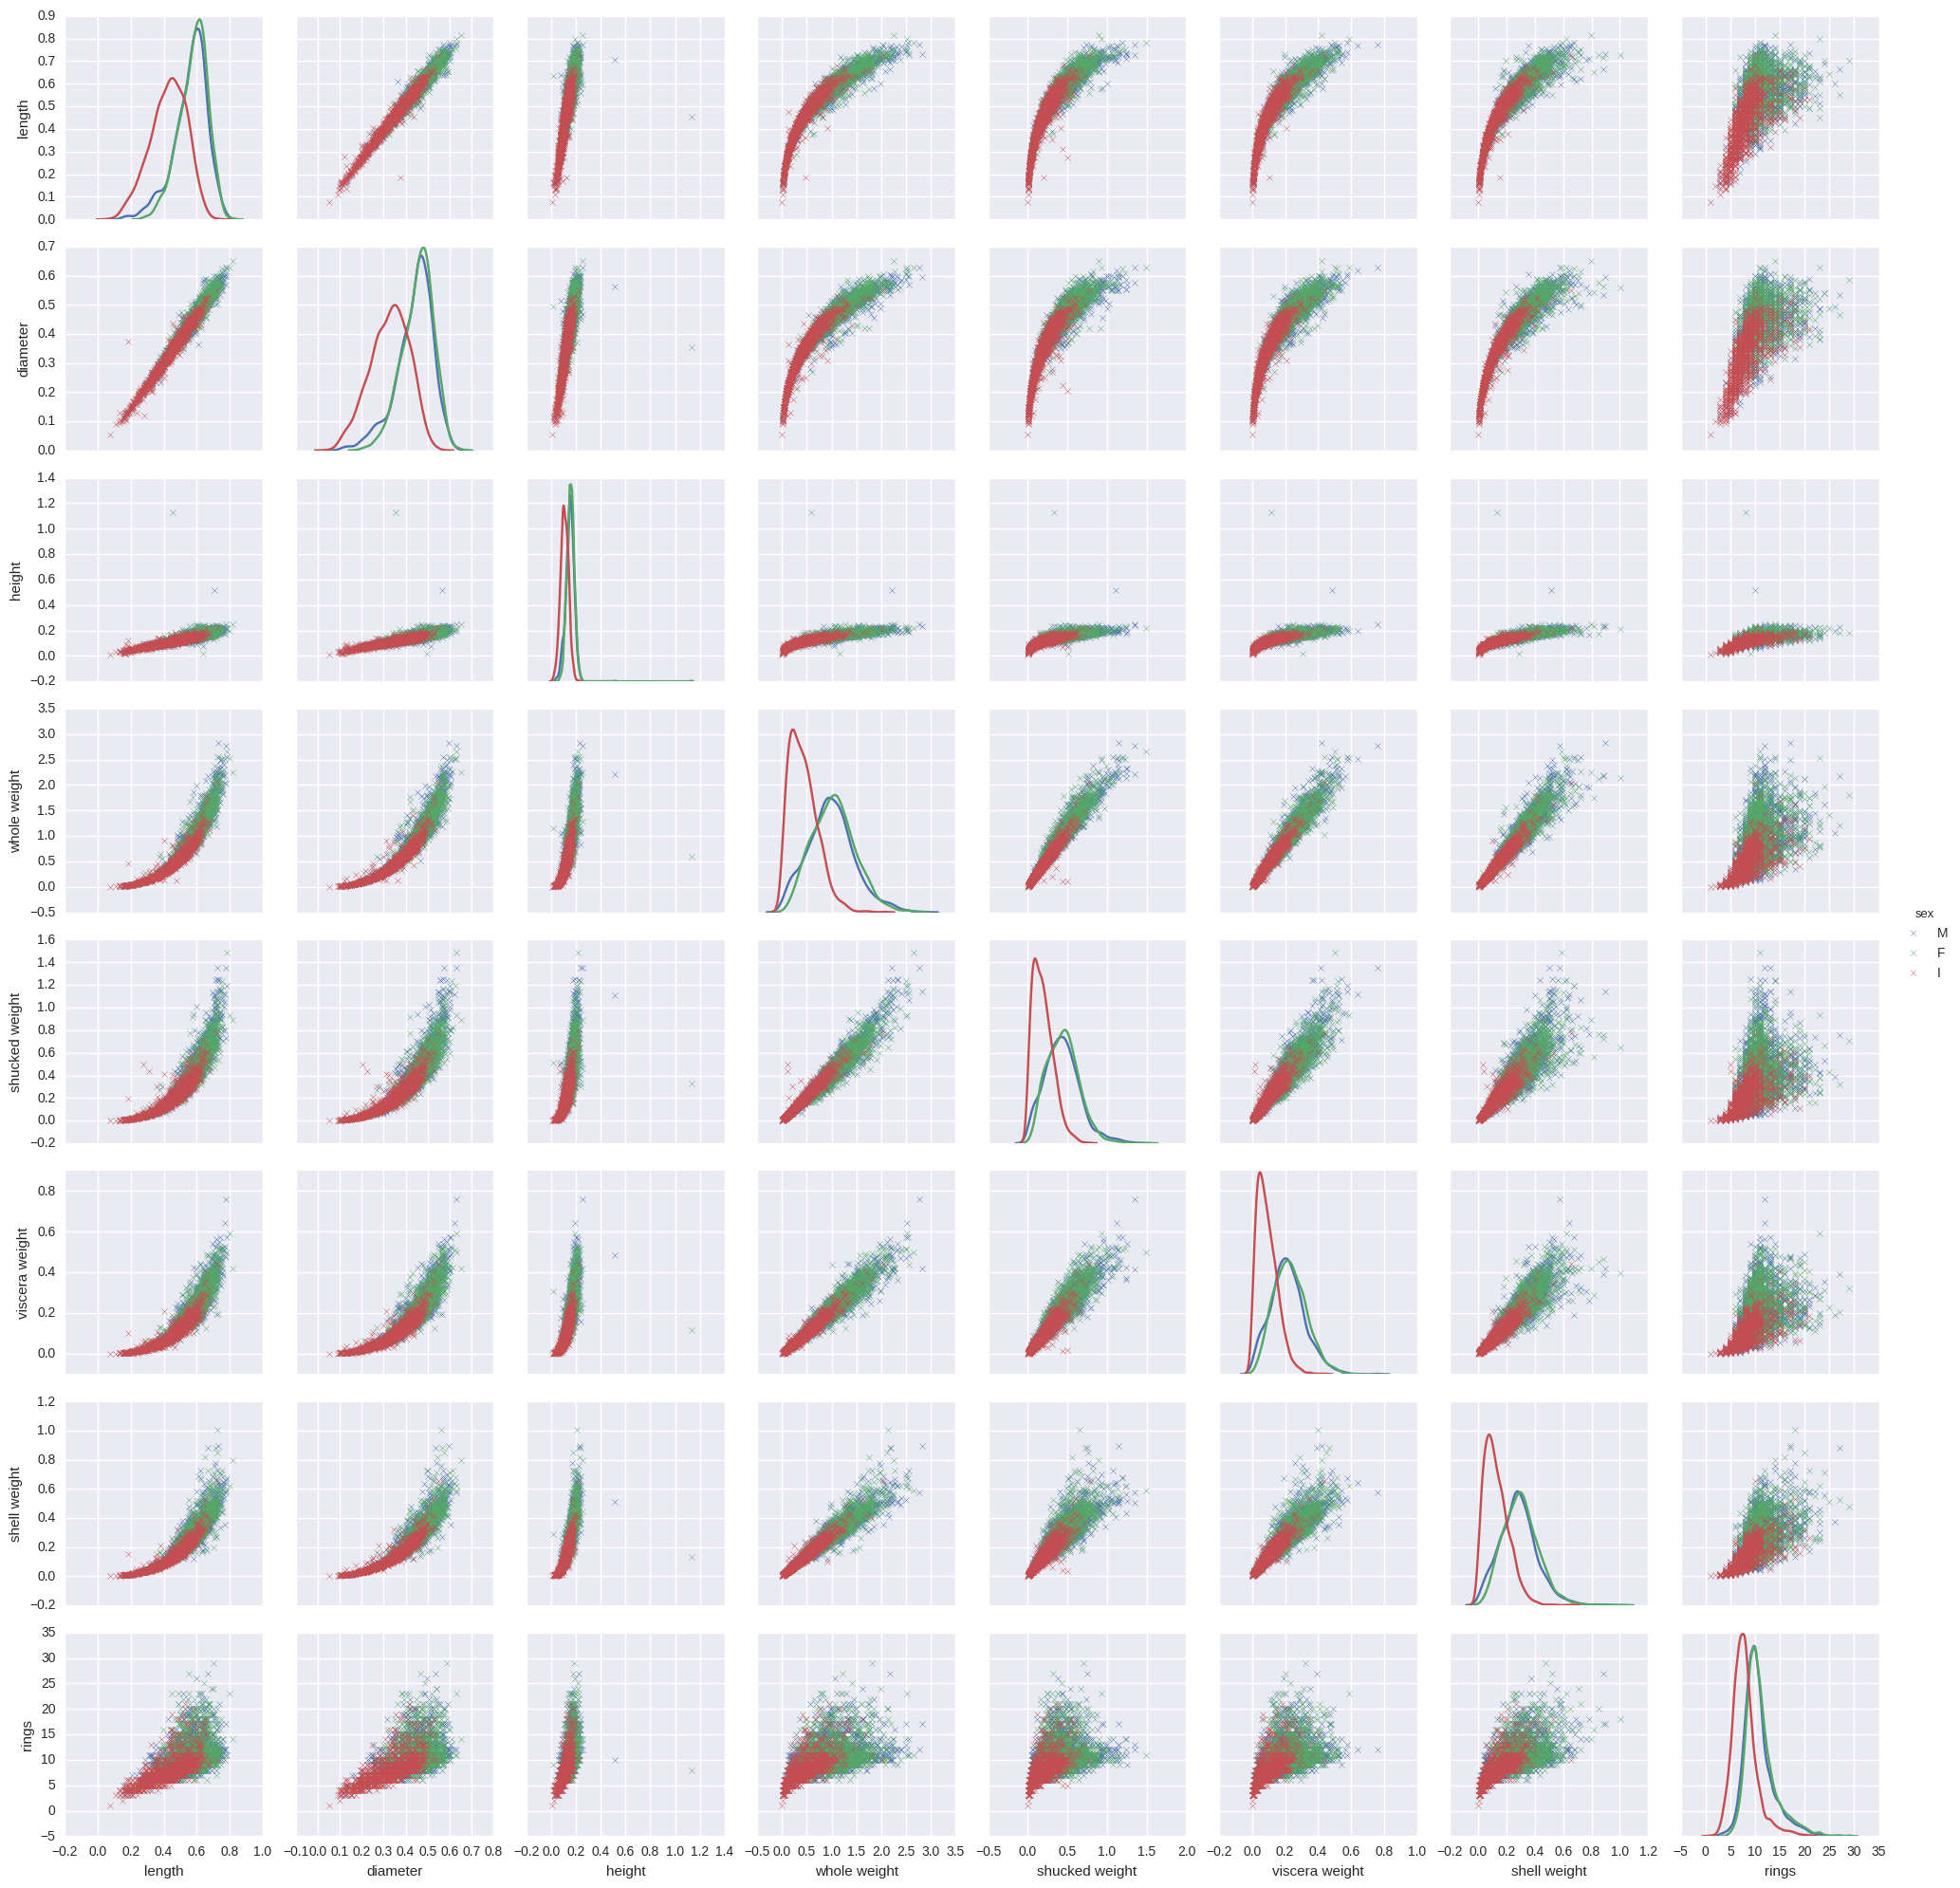

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(abalone, hue='sex', markers='x', diag_kind="kde")
plt.show()

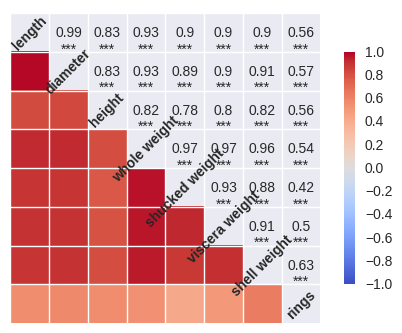

In [25]:
%matplotlib inline
sns.corrplot(abalone)
plt.show()

### 독립변수, 종속변수 준비

'sex'를 dummy 변수로 전환

In [7]:
#Transform sex into a dummy variable
abalone['Male'] = (abalone['sex']=='M').astype(int)
abalone['Female'] = (abalone['sex']=='F').astype(int)
abalone['Infant'] = (abalone['sex']=='I').astype(int)

### 회귀분석


최신버전을 사용한다면 다음을 사용한다.
```python
from sklearn.model_selection import train_test_split
```

In [8]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(abalone,train_size=0.5)

In [11]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error

xtrain = train.drop(['rings','sex'],axis=1)
ytrain = train['rings']
xtest = test.drop(['rings','sex'],axis=1)
ytest = test['rings']

train, test 데이터의 컬럼이 원하는대로 포함되었는지 확인해보자.

In [12]:
print xtrain.head()

      length  diameter  height  whole weight  shucked weight  viscera weight  \
1523   0.690     0.525   0.200        1.7825          0.9165          0.3325   
1558   0.425     0.315   0.080        0.3030          0.1310          0.0585   
1109   0.520     0.400   0.145        0.7765          0.3525          0.1845   
523    0.200     0.140   0.055        0.0350          0.0145          0.0080   
1170   0.625     0.485   0.175        1.3745          0.7335          0.2715   

      shell weight  Male  Female  Infant  
1523         0.461     1       0       0  
1558         0.095     0       0       1  
1109         0.185     1       0       0  
523          0.010     1       0       0  
1170         0.332     0       1       0  


In [13]:
regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print regression.intercept_

4.40379025855e+13


In [15]:
print train.columns,regression.coef_

Index([u'sex', u'length', u'diameter', u'height', u'whole weight',
       u'shucked weight', u'viscera weight', u'shell weight', u'rings',
       u'Male', u'Female', u'Infant'],
      dtype='object') [ -7.39189858e-01   8.34496318e+00   2.04624361e+01   8.29903926e+00
  -1.82187633e+01  -1.09145759e+01   7.90041263e+00  -4.40379026e+13
  -4.40379026e+13  -4.40379026e+13]


컬럼명과 계수를 같이 붙여서 보면 편리하다.
dummy variable???

In [16]:
zip(train.columns,regression.coef_)

[('sex', -0.73918985807191662),
 ('length', 8.3449631800135702),
 ('diameter', 20.462436068390396),
 ('height', 8.2990392622923075),
 ('whole weight', -18.218763256285182),
 ('shucked weight', -10.914575948978094),
 ('viscera weight', 7.9004126304469455),
 ('shell weight', -44037902585540.742),
 ('rings', -44037902585540.727),
 ('Male', -44037902585541.742)]

### 정확성

방금 도출한 선형회귀식의 정확성을 계산해보자.

In [17]:
# Explained variance score: 1 is perfect prediction
accuracy = regression.score(xtest,ytest)
print(accuracy*100,'%')

(51.424204547465415, '%')


In [18]:
import numpy as np
print("Mean squared error: %.2f" % np.mean((regression.predict(xtest) - ytest) ** 2))

Mean squared error: 5.48


예측값과 실제값을 비교해보자.

In [20]:
ypred = regression.predict(xtest)

In [30]:
r2 = r2_score(ytest, ypred )
mae = mean_absolute_error(ytest, ypred)

print r2,mae

0.514242045475 1.62201418822


In [26]:
#_df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred = pd.DataFrame({'Actual': ytest, 'Predicted': ypred.flatten()})
y_actual_pred.head()

,Actual,Predicted
1772,8,7.718750
3981,8,10.500000
651,6,7.046875
2023,9,9.960938
1071,7,6.656250


아래 그림은 예측값 ypred, 실제값 ytest의 산포도를 보여주고 있다.
실선은 실제값 ytest이 예측값과 동일한 경우를 말한다. 즉 100% 정확한 경우를 의미한다.
데이터의 후반부는 **예측값이 약간 아래로 분포**함을 보여주고 있다.

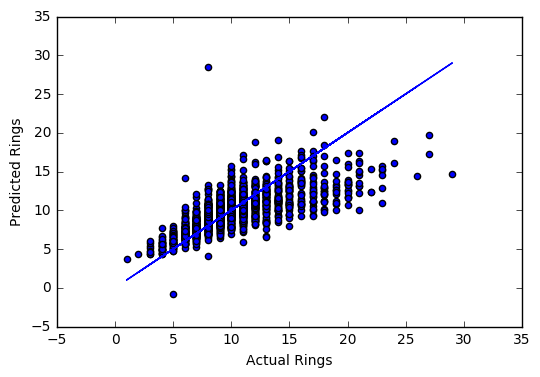

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(ytest,ypred)
ax.set_ylabel('Predicted Rings') 
ax.set_xlabel('Actual Rings')
ax.plot(ytest,ytest)

numpy를 이용
* y = mx + c
* y = Ap, where A = [[x 1]] and p = [[m], [c]]
* m, c = np.linalg.lstsq(A, y)[0]

* plt.plot(x, y, 'o', label='Original data', markersize=10)
* plt.plot(x, m*x + c, 'r', label='Fitted line')


## Local Regression

LOESS (LOcally Estimated Scatterplot Smoothing)는 Cleveland (1979)가 제안하였고, 
가까운 데이터에 대한 가중치를 높이고, 멀어질수록 감소시키는 방식이라 국소회귀라고 한다.
오류의 평균을 최소화하게 되면서, 이로 인한 편차를 줄이기 위한 고안된 방법이다.

* locally weighted linear regression - giving more weight to points near the points and less weight to points further away

* non parametric regression

* $\hat{w} = (X^T W X) ^{-1} X^T W y$
    * 표준회귀분석 ($\hat{w} = (X^T X) ^{-1} X^T y$)에 W를 반영
    * W는 square matrix, 가까운 데이터에 가중치를 더해줌
* Gaussian kernel
    * $w(i,j) = exp \frac{|x_i-x|}{-2\sigma^2}$
    * $\sigma$ 근접 데이터에게 할당되는 비율을 결정하는 계수
        * 범위 0~1
        * 1이면 근접데이터 뿐만 아니라 모든 데이터가 포함 (OLS와 동일)
        * 0.01이면 근접데이터에만 가중치 할당. 
    * $x_i - x$ 작으면 지수의 승수는 0에 가까워지고 $w(i,j) \approx 1$
    * $x_i - x$ 크면 지수의 승수는 큰 음수에 가까워지고 $w(i,j) \approx 0$


Cleveland, William S. (1979). "Robust Locally Weighted Regression and Smoothing Scatterplots". Journal of the American Statistical Association. 74 (368): 829–836. JSTOR


## 데이터 준비

In [183]:
xarr.shape, yarr.shape

((506, 13), (506, 1))

In [188]:
rows=np.shape(xarr)[0]  #506
yhat=np.zeros(rows)  #(506,) 1d zeros
yhat.shape

(506,)

In [16]:
# locally weighted regression
# for non-linear
# Listing 8.2
def gaussianKernel(xtest, x, k=1.0):
    diff = xtest - x
    return np.exp(diff * diff.T / (-2.0 * k**2))
def localWeights(xtest, x, k=1.0):
    xmat = np.mat(x)
    rows = xmat.shape[0]
    # Create diagonal weight matrix from identity matrix
    weights = np.mat(np.eye(rows))
    for i in xrange(rows):
        weights[i, i] = gaussianKernel(xtest, xmat[i,:], k)
    return weights
# singular matrix error (k=0.001)
def localRegress(xt,x,k=1.0):
    rows=np.shape(xt)[0]
    yhat=np.zeros(rows)
    for i in xrange(rows):
        lws=localWeights(xt[i],x,k) #(200,200)
        xTwx=x.T*lws*x # (2,2) <- (2,200)*(200,200)*(200,2)
        if np.linalg.det(xTwx)==0.0:
            print "singular matrix"
            return
        ws=xTwx.I*x.T*lws*y.T #(200,1)??
        yhat[i]=xt[i]*ws
        # print "i={0} yhat={1} xt={2}".format(i,yhat[i],xt[i])
    return yhat

yhatLocal=localRegress(x,x)

print yhatLocal

[ 3.12204471  3.73284336  4.69692033  4.25997574  4.67205815  3.89979584
  3.64981617  3.06462993  3.23234485  3.24169633  3.42741618  4.10707034
  4.24787613  3.40879727  4.65288661  4.03784328  3.61542726  3.25787329
  4.08932965  3.39783761  3.12629106  3.12106493  4.57784181  4.22499774
  3.03329674  3.57546269  3.07586196  3.36765021  4.05435451  3.92530073
  3.08411123  3.22212205  3.95125595  4.53636662  4.63368585  3.47279924
  3.67613549  4.48770772  3.70250157  4.54964976  3.29004763  4.13549978
  3.45441958  3.39926586  3.9452161   3.08816389  3.62751621  3.84688831
  3.84428111  4.35125277  4.31315478  3.43422203  3.31571015  4.3785447
  3.57384393  3.58150337  3.7748906   4.18601319  4.00967978  3.52940957
  3.25875168  4.19859322  4.23146773  4.13867447  3.21901745  4.0561676
  3.65354789  3.66128122  4.325913    3.2040255   3.20300481  4.13294306
  3.43941808  4.69379223  3.50821162  4.6235812   3.5279148   3.47737983
  3.48050144  3.30514953  3.27235     4.25119686  4.4

## shrinkage methods


In terms of Linear Regression, one can use Ridge, Lasso, or Elasticnet Regularization techniques to handle overfitting

OLS에 비해 정확성이 향상하는 이유
* ridge regression의 경우
    * $\lambda=0$이면 variance증가, bias=0
    * $\lambda$가 증가하면 variance감소, bias증가

### ridge

* ridge regression는 OLS + L2 penalty. OLS와 동일하지만 L2 penalty를 더함.
* Andre Tikhonov
* 최적화 문제
    * min $f=RSS=\sum_{i=1}^n(y_i-w_0 - \sum_{j=1}^p w_jx_{ij})^2$
    * s.t. $\sum_{j=1}^p w_j^2 \le t$
    * 상수 $w_0$는 식에서 제외
* Lagrange multiplier 이용:
    f = $(y-wx)^2 + \lambda w^2$ 오류를 최소화 하는 w를 찾음.
    * the first term: RSS (OLS)
    * the second term: shrinkage penalty (L2 norm (least squared error))
    * as $\lambda \rightarrow 0$, $\beta_{ridge} \rightarrow \beta_{ols}$
        i.e., no penalty
    * as $\lambda \rightarrow \infty$, $\beta_{ridge} \rightarrow 0$
        i.e., penalty increases
* 위를 미분하면 $\frac{\partial f}{\partial w} =
    -2(x^Tx + \lambda I)w -2x^Ty$
    * $\hat{w} = (X^T X + \lambda I) ^{-1} X^T y$
    * Identity matrix: n × n square matrix with ones on the main diagonal and zeros elsewhere (np.eye와 동일)
    * 계산식에서 $X^T X$의 결과가 square matrix (X의 열갯수의 정방형)이라서, Identity Matrix로 연산함.

* gradient descent
βj := βj - α[(1/m)Σ(yi-f(xi))(xi)+(λ/m)βj]

* Ridge regression의 단점
    * 최종 모델에 모든 속성을 포함하게 됨.
    * $\lambda$ 값이 증가하면 w를 줄일 수 있지만 0으로 만들지 못함
        (즉, 속성 제거 불가능) (unless $\lambda = \infty$)

In [19]:
# new from here 20150516
# ridge
# lasso

def ridgeGradientDescent(x, y, alpha, iters, L):
    x=np.matrix(x)
    y=np.matrix(y).T
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        yhat = np.dot(x, beta)
        residuals = yhat - y
        MSE = (residuals.transpose()*residuals)/len(x)
        print "iteration:", i, "MSE:", MSE
        ols_gradient = np.dot(XT, residuals) / m
        beta = beta - alpha * (ols_gradient + (L/m)*beta)
    return beta

def ridgeWeights(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    xTxlamI = xTx + np.eye(np.shape(xMat)[1])*lam
    if linalg.det(xTxlamI) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTxlamI.I * (xMat.T*yMat)
    return ws


### lasso

* ridge regression은 속성을 제거하지 못하지만, lasso는 속성을 제거할 수 있슴.
* Ridge regression과의 차이는 L1 norm penalty를 더함 (least absolute error)
* Minimize

$\sum (y-\hat{y})^2 \text{ s.t. }\sum_{j=1}^p w_j \le t$

* Lagrange multiplier 이용:
    f = $(y-wx)^2 + \lambda |w|$ 오류를 최소화 하는 w를 찾음.
* $\lambda$가 증가하게 되면, w가 0이 되는 속성이 생겨남. 변수제거 효과.

### Least angle regression algorithm:

* lasso를 계산하는 방식의 하나로서, 마지막 최종모델에는 영향이 적은 속성을 제거함. 아래 알고리듬에서 보듯이, 모든 변수가 포함되지 않더라도 stopping가능.


* Start with all weights $w_j = 0$
* Find the $x_j$ most correlated with residials (최소 RSS를 갖은 속성을 찾음)
* Increase the coefficient $w_j$ in the direction of the sign of its correlation with y (eps*sign). Take residuals rss=y-yhat along the way. Stop when some other predictor xk has as much correlation with r as $x_j$ has.
* Increase (bj, bk) in their joint least squares direction, until some other predictor xm has as much correlation with the residual r.
* Continue until: all predictors are in the model


## forward stagewise

* forward stagewise regression
    * 모든 변수를 포함하지 않아도 됨
    * Whereas forward selection finds the variable with the most explanatory power and goes all out in adding it to the model, forward stagewise finds the variable with the most explanatory power and updates its weight by only epsilon in the correct direction.
    * The problem now is to make a ton of updates, so forward stagewise can be very inefficient.

* x,y 표준값으로 ($\epsilon$증가가 표준화되도록)
* initialize intercept and all weights $w_0, w_1, \cdots ,w_p = 0$
* for niter
    * find the variable $x_j$ most correlated with residuals
    * update $w_j \leftarrow w_j + \epsilon \cdot sign<w,x_j>$
    * $w \leftarrow w$ if rss is lower 


In [18]:
def stageWise(x,y,eps=0.01,niter=100):
    xmat=np.mat(x)
    ymat=np.mat(y)
    ym=ymat.T-np.mean(ymat.T,0)
    # standardize (z value)
    xm=(xmat-np.mean(xmat,0))/np.var(xmat,0)
    r,c=np.shape(xm)
    ws=np.zeros((c,1))
    wsTest=ws.copy()
    wsMax=ws.copy()
    wsAll=ws.copy()
    for i in range(niter):
        lowestErr=np.inf
        # find xj with the least error
        for j in range(c):
            for sign in [-1,1]:
                # compute new w
                wsTest=ws.copy()
                wsTest[j]+=eps*sign
                yTest=xm*wsTest #(r,1) = (r,c) (c,1)
                rssE=rss(ym,yTest)
                # find least error
                if rssE < lowestErr:
                    lowestErr=rssE
                    wsMax=wsTest
        # update w
        ws=wsMax.copy()
        wsAll=np.hstack((wsAll,ws))
    return wsAll

eps=0.01
abX,abY=regression.loadDataSet(abalone)
#[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
stageWs=stageWise(abX,abY,0.01,200)

print stageWs[:,200]

[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]


## bias variance tradeoff

* Ridge regression’s advantage over least squares is rooted in the bias-variance trade-off.
* As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias. 

* small variance and high bias underfit the truth target.
* high variance and low bias overfit the truth target

* $E[(y - \hat{y})^2] = Bias^2 + Var + \sigma^2$
* $Bias = E[\hat{y}] - y$ 기대예측값과 실제값의 차이
* $Var = E[(\hat{y} - E[\hat{y}])^2]$ how much $\hat{y}$ move around its mean

* 모델의 정확성을 높일수록, bias는 감소, variance는 증가.

## 4.5 R squared

### data

In [3]:
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])
A=np.array([x,np.ones(9)])
print A

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]]


### numpy listsq

In [4]:
w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

0.716666666667 19.1888888889


In [161]:
yhat=w0*x+w1
print yhat

[ 19.18888889  19.90555556  20.62222222  21.33888889  22.05555556
  22.77222222  23.48888889  24.20555556  24.92222222]


### 그래프

예측 yhat과 실제 y의 그래프를 그려보자.
예측은 빨간 실선 (r-), 파란 점 (bo)로 그린다.

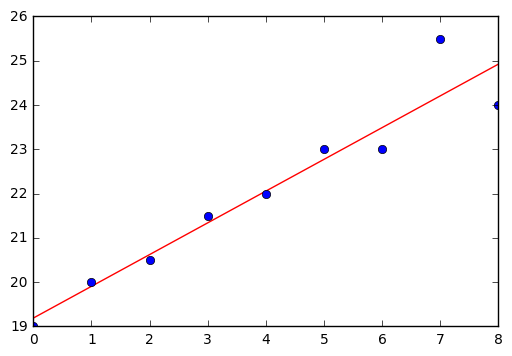

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

### R squared

```python
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
```

OLS는 ```add_constant()```함수를 사용하여 절편을 구할 수 있다.
또는 앞서 numpy에서 해주었던 것과 같이 1을 넣어서 절편을 구해준다.

In [19]:
import statsmodels.formula.api as sm
result = sm.OLS(y,A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj
# 0.877643371323 0.863248473832

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           5.66e-05
Time:                        17:55:38   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.0

## 4.3 nonlinear fitting

데이터가 선형적 관계를 가지고 있지 않을 경우, 
* 1 dimension

* nth order polynomial

$\sum\limits_{i=0}^n a_i x^i$

이 경우 coefficients는 $a_n, a_{n-1},…,a_1, a_0$

poly1d( coefficients )

$p(x) = \frac{x^4}{5} + 3x^2 - 7x + 5$

polyid( [ 0.2, 0, 3, -7, 5 ] )

### 선형 polyfit

x는 0~20의 정수, y는 기울기slope 2, 절편 offset 3으로 하고 약간의 무작위수를 더한다.

In [173]:
npoints = 20
slope = 2
offset = 3
x = np.arange(npoints)
y = slope * x + offset + np.random.normal(size=npoints)
print x,y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [  3.21709746   4.94106904   6.54113144   9.92165027  10.86017677
  15.76247466  14.89786716  16.82597451  18.47025503  18.4724765
  23.27508711  25.90207888  26.27952149  30.79845231  32.00569443
  33.07709142  37.30574166  39.12370362  39.60161615  41.44655087]


그리고 선형 즉 직선으로 y = mx + b 모델링하려면, polyfit 1로 한다.

In [174]:
p = np.polyfit(x,y,1)
print p

[ 2.05756815  2.88938812]


그래프를 그려보자

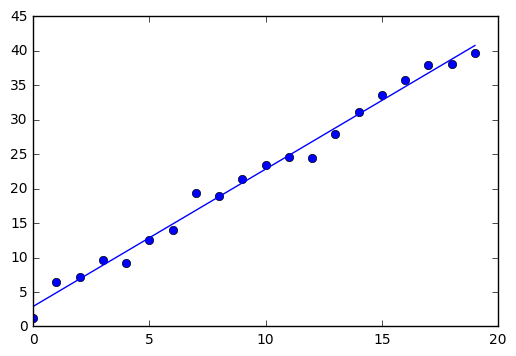

In [172]:
import matplotlib.pyplot as plt
f = np.poly1d(p)                # So we can call f(x)
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(x, y, 'bo', label="Data")
plt.plot(x,f(x), 'b-',label="Polyfit")
plt.show()

In [ ]:
# numpy.lstsq(x,y)에서 x는 2차원 y는 1차원 배열.
y=range(1,5)
x=range(11,15)
xx=np.vstack((x,np.zeros(len(x)))) #또는 >>> [ [v,0] for v in x ]
#xx=[ [v,0] for v in x ]
np.linalg.lstsq(xx.T,y)
# (array([ 0.20634921,  0.        ]), array([], dtype=float64),
# 1, array([ 25.0998008,   0.       ]))

# 손으로 OLS 회귀분석 (inverse error)
p = (X.T * X).I * X.T * y
# np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
(p, residuals, rank, s) = np.lstsq(X, y)
p = np.polyfit(x, y, degree)

### 비선형 polyfit

In [190]:
# 1) numpy.poly1d one-dimensional polynomial class
import numpy as np

x=np.linspace(1,7,50)
y=np.sin(x)
x = np.array([10, 20, 30, 40, 50])
y = np.array([20, 40, 30, 10, 40])

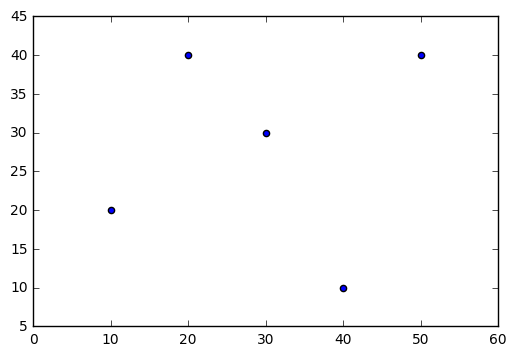

In [191]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [197]:
 np.linspace(1,10,10)
#np.arange(1,10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [192]:
coefficients=np.polyfit(x,y,3)
polynomial=np.poly1d(coefficients)
print "coefficients=",coefficients
print "polynomial=",polynomial

coefficients= [  0.00666667  -0.59285714  15.4047619  -82.        ]
polynomial=           3          2
0.006667 x - 0.5929 x + 15.4 x - 82


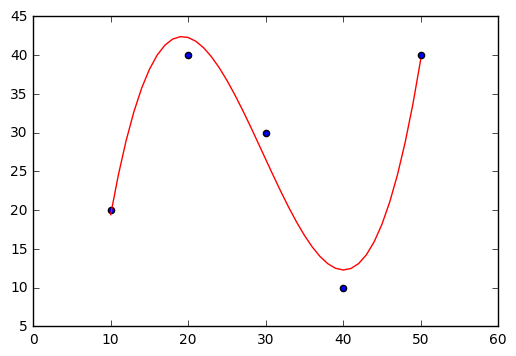

In [205]:
plt.scatter(x,y)
x50=np.arange(10,51)
plt.plot(x50,polynomial(x50),'r-')
plt.show()

In [179]:
# differentiation 미분
# q(x) = 2x^2 - x + 3
q=np.poly1d( [ 2, -1, 3 ] )
print q

   2
2 x - 1 x + 3


In [180]:
print q(0)
print q(1)
print q(2)

3
4
9


In [181]:
print q.deriv() #poly1d([ 4, -1])

# integration 적분
print q.integ() #poly1d([ 0.66666667, -0.5       ,  3.        ,  0.        ])

 
4 x - 1
        3       2
0.6667 x - 0.5 x + 3 x


In [182]:
# polyfit - least-squares polynomial fit
x=[0., 1., 2., 3., 4.]
y=[1., 2., 5., 10., 17.]
print x #[0.0, 1.0, 2.0, 3.0, 4.0]
print y #[1.0, 2.0, 5.0, 10.0, 17.0]
p=np.poly1d(np.polyfit(x,y,2))
print p #poly1d([  1.00000000e+00,  -4.10782519e-15,   1.00000000e+00])

#식을 출력
print "--------"
print "p=",p
print "--------"
print "q=",q

#식을 연산할 수도 있다
print "--------"
print "p+q=",p+q

[0.0, 1.0, 2.0, 3.0, 4.0]
[1.0, 2.0, 5.0, 10.0, 17.0]
   2
1 x - 4.338e-15 x + 1
--------
p=    2
1 x - 4.338e-15 x + 1
--------
q=    2
2 x - 1 x + 3
--------
p+q=    2
3 x - 1 x + 4


## 문제 iris


### 데이터 읽기

데이터를 UCI 웹사이트에서 읽어보자.
csv파일은 순수 데이터로만 구성되어 있어, 컬럼명```names```을 별도로 넣어준다.
데이터가 잘 읽혀졌는지 ```head()``` 함수로 일부 읽어보자.

In [37]:
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [76]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [52]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


count, mean, standard deviation, minimum and maximum values and the quantiles of the data. 

In [77]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


missing values 결측 값이 있는지 확인한다.

In [85]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### petal 너비와 길이 그래프

우선 ```petal_length```와 ```petal_width``` 두 변수간 관계와 회귀선을 그래프로 그려보자.
```sns.lmplot()```는 입력변수 x, y, DataFrame을 인자로 넣어준다.
여기서 x, y는 DataFrame의 컬럼명을 적는다는 점에 주의한다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f961ae57950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f961b00d990>]], dtype=object)

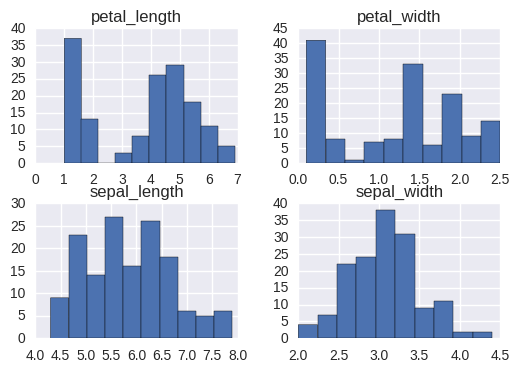

In [67]:
%matplotlib inline
iris.hist()

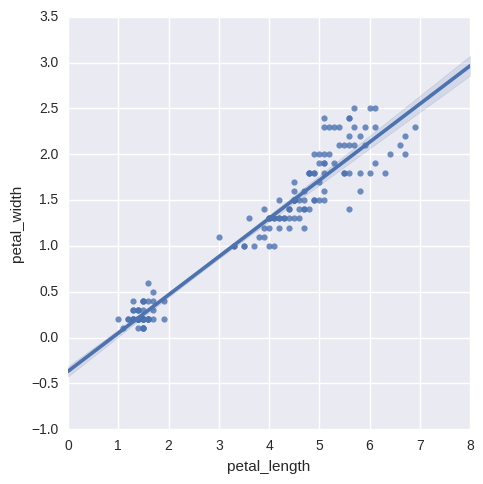

In [48]:
import seaborn as sns
sns.lmplot(x="petal_length", y="petal_width", data=iris)
sns.plt.show()

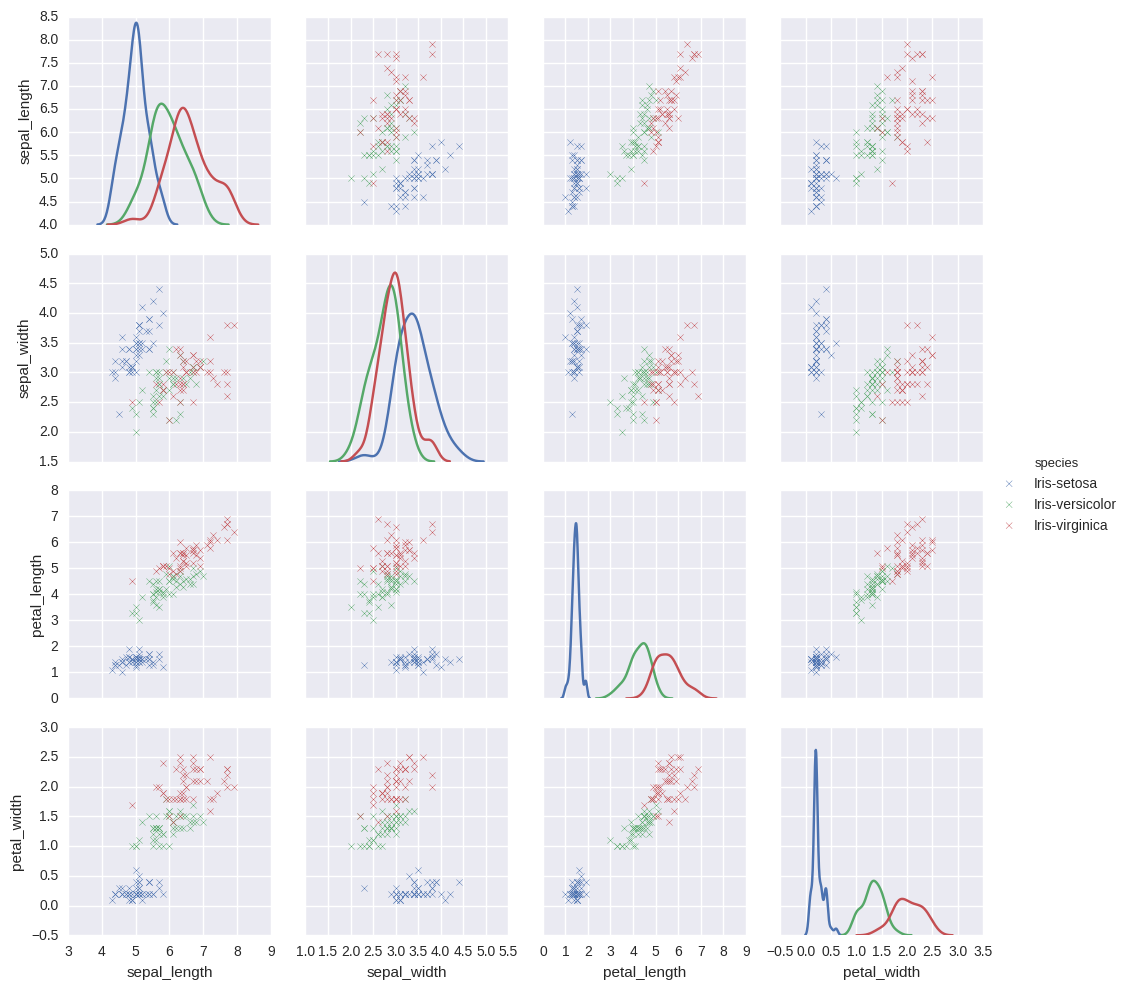

In [81]:
sns.pairplot(iris, hue='species', markers='x', diag_kind="kde")

### numpy 회귀분석

```petal_length```와 ```petal_width```를 회귀분석해보자.
x에는 절편을 도출하기 위해 1을 추가해준다.
따라서 x는 다음과 같이 만들어진다.

```python
[ 1.4,  1. ]
[ 1.4,  1. ]
[ 1.3,  1. ]
[ 1.5,  1. ]
```

numpy의 최소자승법 결과는 [ 0.41641913, -0.36651405]이다.
이는 y=ax+b에서 a=-0.36651405, b=0.41641913이다.

In [57]:
import numpy as np
x=iris["petal_length"]
y=iris["petal_width"]
A=np.array([x,np.ones(len(x))])
print("A=", A.T[:5],"y=",y[:5])
print("Least Sq: ",np.linalg.lstsq(A.T,y))

('A=', array([[ 1.4,  1. ],
       [ 1.4,  1. ],
       [ 1.3,  1. ],
       [ 1.5,  1. ],
       [ 1.4,  1. ]]), 'y=', 0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: petal_width, dtype: float64)
('Least Sq: ', (array([ 0.41641913, -0.36651405]), array([ 6.34349195]), 2, array([ 52.03171411,   5.06958846])))


vander()함수를 사용해도 된다. 역시 같은 결과가 도출된다.

In [58]:
Av = np.vander(x, 2)  #add a constant row for an intercept
print(Av[:5])
np.linalg.lstsq(Av,y)

[[ 1.4  1. ]
 [ 1.4  1. ]
 [ 1.3  1. ]
 [ 1.5  1. ]
 [ 1.4  1. ]]


(array([ 0.41641913, -0.36651405]),
 array([ 6.34349195]),
 2,
 array([ 52.03171411,   5.06958846]))

### statsmodels 회귀분석

입력값은 x의 Transpose인 A.T로 입력값을 적어준다.
그 결과는 R의 결과값과 같이 출력된다.
results coef의 x1, const의 값이 동일하게 도출된다.

In [59]:
import statsmodels.api as sm

model = sm.OLS(y, A.T)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           5.78e-86
Time:                        15:15:11   Log-Likelihood:                 24.400
No. Observations:                 150   AIC:                            -44.80
Df Residuals:                     148   BIC:                            -38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.4164      0.010     43.320      0.0

### sklearn 회귀분석

앞과 동일하게, 입력값은 x의 Transpose인 A.T로 입력값을 적어준다.

In [63]:
from sklearn.linear_model import LinearRegression
X = iris["petal_length"]
y = iris["petal_width"]

# Fit the linear model
model = LinearRegression()
results = model.fit(A.T, y)
print results.intercept_, results.coef_

-0.366514045217 [ 0.41641913  0.        ]


### 모든 

```iris.values```의 모든 행, 열 0,1,2,3을 선택해보자.

In [74]:
x=iris.values[:,0:4]
y=iris.values[:,4]
print(x.shape, y.shape)

((150, 4), (150,))


In [75]:
model = LinearRegression()
results = model.fit(x, y)
print results.intercept_, results.coef_

ValueError: could not convert string to float: Iris-virginica

In [29]:
dummies = pd.get_dummies(iris["species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


## 문제 주택가격 분석

## sklearn

linear algebra 라이브러리 사용 회귀분석

In [128]:
from sklearn import datasets
boston=datasets.load_boston()

데이터는 행 506, 열 13로 구성되어 있다.
열은 
'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율

6번째 변수 RM은 'average n of rooms per dwelling'
* 종속변수는 boston.target '주택가격'으로 설정
    1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

In [129]:
print(boston.keys())

['data', 'feature_names', 'DESCR', 'target']


In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
print(boston.data.shape)

(506, 13)


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


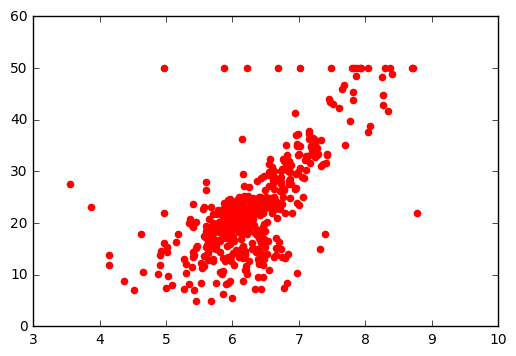

In [8]:
%matplotlib inline
plt.scatter(boston.data[:,5],boston.target,color='r')
plt.show()


In [149]:
import pandas as pd
X=pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


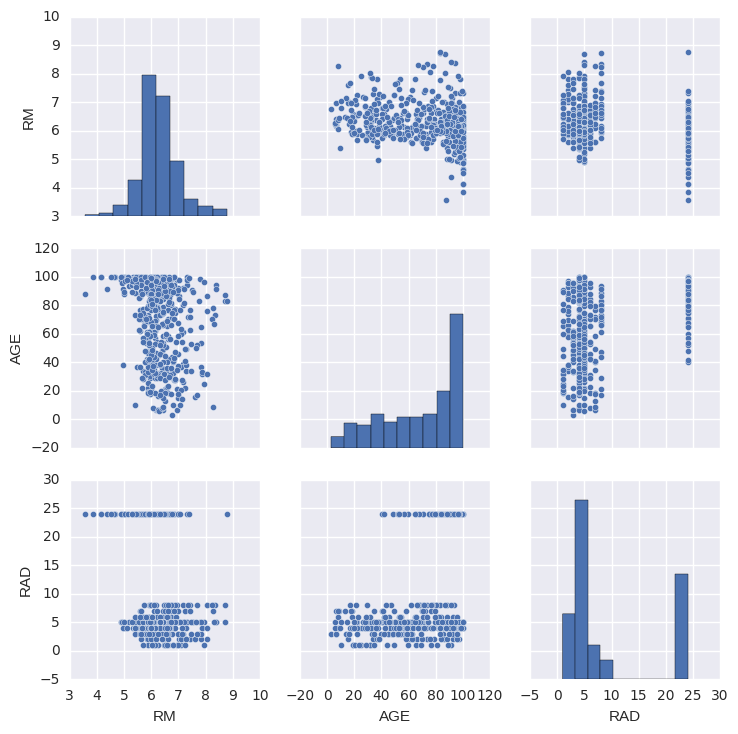

In [13]:
import seaborn as sns
cols = ["RM", "AGE", "RAD"]
sns.pairplot(X[cols])
plt.show()

In [14]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


X 데이터프레임에 Y를 추가하려면 간단하게 컬럼명을 정해주고 Y를 할당하면 된다.
```python
X['MEDV']=Y
```

In [150]:
Y = pd.DataFrame(boston.target, columns=["MEDV"])

버전에 따라 sklearn v0.18 이전에는 ```train_test_split```은 ```cross_validation```에 있었는데 그 후 변경되었다.
```python
from sklearn.cross_validation import train_test_split
```

In [19]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

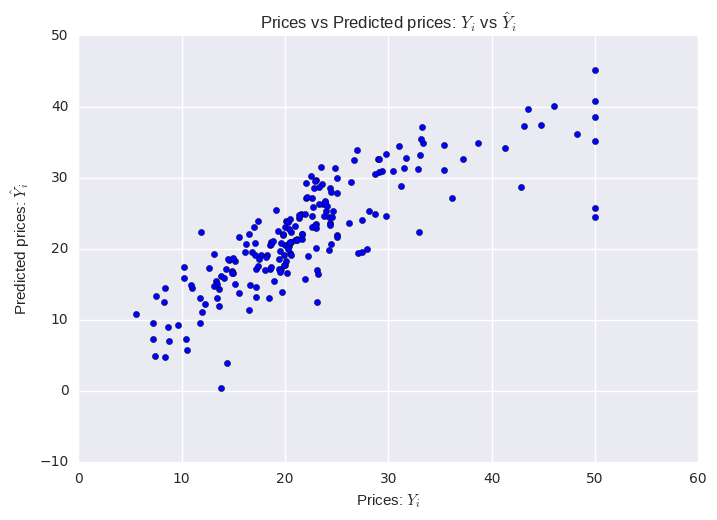

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [22]:
import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

25.7971648592


### Lasso

In [151]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [152]:
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### numpy로 listsq

In [156]:
xarr=np.array(X)
yarr=np.array(Y)
print np.linalg.lstsq(xarr,yarr)

(array([[-0.09162978],
       [ 0.04867512],
       [-0.0037793 ],
       [ 2.85636751],
       [-2.88077933],
       [ 5.92521432],
       [-0.00722448],
       [-0.96799524],
       [ 0.17044339],
       [-0.00938925],
       [-0.39242568],
       [ 0.01498321],
       [-0.41697262]]), array([ 12231.2173457]), 13, array([ 12585.17815115,   3445.94113883,    645.75635213,    402.04455461,
          159.51772262,    121.56680128,     90.57578128,     77.86975099,
           65.1102044 ,     24.62518604,     18.09584843,      5.51519014,
            1.48089738]))


### sklearn lasso

컬럼벡터 yarr.shape (506,1)를 **1d array**인 yarr.ravel().shape (506,)로 변경해준다.
안 그러면 Warning이 뜬다.

ravel() 함수는 배열을 1d로 만들어 준다.
예를 들어, ```[[1 2 3] [4 5 6]]```를 ```[1 2 3 4 5 6]```으로 변환한다. 

In [177]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(fit_intercept=True, alphas=[.125,.25,.5,1.,2.,4.])

yhat_lasso = lasso.fit(xarr,yarr.ravel())
print yhat_lasso
#print "r^2 on test data : %f" % (1 - np.linalg.norm(y_test - y_pred_lasso) ** 2
#                                      / np.linalg.norm(y_test) ** 2)

LassoCV(alphas=[0.125, 0.25, 0.5, 1.0, 2.0, 4.0], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)


In [178]:
yhat_lasso.coef_

array([-0.09656256,  0.0493073 , -0.0318412 ,  0.55775464, -0.        ,
        3.62683256, -0.00861588, -1.14676324,  0.27727757, -0.0148005 ,
       -0.77562715,  0.0103269 , -0.57645143])

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

### sklearn Ridge

In [176]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.01)
r.fit(xarr, yarr)
print(r.score(xarr, yarr))

0.740607266987


In [179]:
r.coef_

array([[ -0.10711135,   0.04641108,   0.02037691,   2.68683789,
        -17.68106763,   3.80566015,   0.00064898,  -1.4740674 ,
          0.3053845 ,  -0.01233842,  -0.95219114,   0.00939847,
         -0.52559349]])

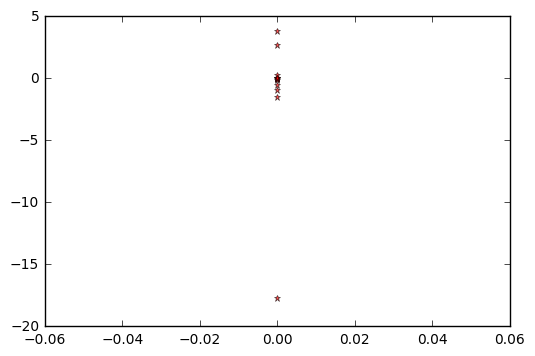

In [181]:
import matplotlib.pyplot as plt
plt.plot(r.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)

### statsmodels

In [23]:
import statsmodels.api as sm
# Fit and make the predictions by the model
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Sat, 27 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:47:54   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008        -0.159    -0.024
ZN             0.0487      0.014      3.379      0.001         0.020     0.077
INDUS         -0.0038      0.064     -0.059      0.953        -0.130     0.123
CHAS           2.8564      0.904      3.160      0.002         1.080     4.633
NOX           -2.8808      3.359     -0.858      0.392        -9.481     3.720
RM             5.9252      0.309     19.168      0.000         5.318     6.533
AGE           -0.0072      0.014     -0.523      0.601        -0.034     0.020
DIS           -0.9680      0.196     -4.947      0.000        -1.352    -0.584
RAD            0.1704      0.067      2.554      0.011         0.039     0.302
TAX           -0.0094      0.004     -2.393      0.017        -0.017    -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000        -0.608    -0.177
B              0.0150      0.003      5.561      0.000         0.010     0.020
LSTAT         -0.4170      0.051     -8.214      0.000        -0.517    -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Spark

In [2]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

### Jupyter에서 Python3을 사용하기

Python2 대신 Python3을 사용하려면, 다음 환경변수를 설정한다.
```python
$ vi $SPARK_HOME/conf/spark-env.sh
Goto the bottom of the file and copy paste these lines

export PYSPARK_PYTHON=python3
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS="notebook"
```

Notebook에서는 다음과 같이 ```PYSPARK_PYTHON```, ```PYSPARK_DRIVER_PYTHON```을 python3로 설정한다.

In [3]:
os.environ["PYSPARK_PYTHON"]=os.path.join('/usr','local','bin','python3')
os.environ["PYSPARK_DRIVER_PYTHON"]=os.path.join('/usr','local','bin','python3')

### spark 생성

In [25]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 데이터 생성

sklearn 데이터를 Pandas를 경유해 생성.

#### boston.data와 boston.target 데이터를 어떻게 합치나

두 데이터를 합치려면 shape을 알아야 한다.
(506, 13)과 (506,)를 합쳐서 (506,14)로 만들자.


In [26]:
print("boston data: ", type(boston.data), boston.data.shape)
print("boston data: ", type(boston.target), boston.target.shape)

('boston data: ', <type 'numpy.ndarray'>, (506, 13))
('boston data: ', <type 'numpy.ndarray'>, (506,))


#### (n,)과 (n,1)의 차이

잠깐 (n,)과 (n,1)은 서로 다른 행렬이라는 점에 주의한다.
```python
#(4,1) 4 x 1 2차원 array
[[1],
 [2],
 [3],
 [4]]
#(4,) 길이 4인 array
[1,2,3,4]
```

이 경우 ```column_stack()``` 함수로 두 행렬을 합칠 수 있다.
이 때 두 행렬을 괄호로 묶어주어야 한다.

In [27]:
v1=np.array([[1],[2],[3],[4]])
print(v1.shape)
v2=np.array([1,2,3,4])
print(v2.shape)

(4, 1)
(4,)


In [28]:
v3=[[11,22],[33,44],[55,66],[77,88]]
np.column_stack((v3,v2))

array([[11, 22,  1],
       [33, 44,  2],
       [55, 66,  3],
       [77, 88,  4]])

#### boston.data와 boston.target 데이터를 합치기

컬럼명도 합쳐보자.

In [29]:
import numpy as np
XY=np.column_stack((boston.data, boston.target))

In [30]:
np.append(boston.feature_names,"MEDV")

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], 
      dtype='|S7')

numpy에서 데이터를 읽으면 data type을 재정의해주어야 한다. 따라서 Pandas를 경유해서 Spark DataFrame으로 읽어온다.

In [31]:
import pandas as pd

#X=pd.DataFrame(boston.data, columns=boston.feature_names)
#Y=pd.DataFrame(boston.target, columns=["MEDV"])
Z=pd.DataFrame(XY, columns=np.append(boston.feature_names,"MEDV"))

In [32]:
Z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [145]:
Z.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 

In [33]:
from pyspark.sql.types import FloatType
bos=spark.createDataFrame(Z)

In [34]:
bos.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: double (nullable = true)
 |-- TAX: double (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



In [35]:
bos.head()

Row(CRIM=0.00632, ZN=18.0, INDUS=2.31, CHAS=0.0, NOX=0.538, RM=6.575, AGE=65.2, DIS=4.09, RAD=1.0, TAX=296.0, PTRATIO=15.3, B=396.9, LSTAT=4.98, MEDV=24.0)

 'MEDV'는 제외하고 features를 만든다.

In [36]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
bosFeatures = vectorAssembler.transform(bos)
#vhouse_df = vhouse_df.select(['features', 'MV'])
bosFeatures.show(10)

+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM|  AGE|   DIS|RAD|  TAX|PTRATIO|     B|LSTAT|MEDV|            features|
+-------+----+-----+----+-----+-----+-----+------+---+-----+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31| 0.0|0.538|6.575| 65.2|  4.09|1.0|296.0|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421| 78.9|4.9671|2.0|242.0|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185| 61.1|4.9671|2.0|242.0|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18| 0.0|0.458|6.998| 45.8|6.0622|3.0|222.0|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18| 0.0|0.458|7.147| 54.2|6.0622|3.0|222.0|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18| 0.0|0.458| 6.43| 58.7|6.0622|3.0|222.0|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87| 0.0|0.5

In [16]:
bosFeatures.dtypes

[('CRIM', 'double'),
 ('ZN', 'double'),
 ('INDUS', 'double'),
 ('CHAS', 'double'),
 ('NOX', 'double'),
 ('RM', 'double'),
 ('AGE', 'double'),
 ('DIS', 'double'),
 ('RAD', 'double'),
 ('TAX', 'double'),
 ('PTRATIO', 'double'),
 ('B', 'double'),
 ('LSTAT', 'double'),
 ('MEDV', 'double'),
 ('features', 'vector')]

In [37]:
bosFeatures.describe()

DataFrame[summary: string, CRIM: string, ZN: string, INDUS: string, CHAS: string, NOX: string, RM: string, AGE: string, DIS: string, RAD: string, TAX: string, PTRATIO: string, B: string, LSTAT: string, MEDV: string]

In [38]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MEDV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(bosFeatures)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.033105731387,0.00928315690178,0.0,2.24678232414,-7.2191724694,4.34760874657,0.0,-0.602323084122,0.0,0.0,-0.822234533043,0.00811987742042,-0.503757321707]
Intercept: 20.0107307055


In [48]:
_Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## to clean 20190724

In [199]:
# %load -r 1-85 todel.md
import statsmodels.api as sm
mass=sm.datasets.get_rdataset("survey","MASS")
mass.data.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [200]:
mass.data.groupby('Sex').mean()

,Wr.Hnd,NW.Hnd,Pulse,Height,Age
Sex,,,,,
Female,17.595763,17.45678,75.126316,165.686667,20.407534
Male,19.741880,19.71453,73.197917,178.826038,20.331958


In [201]:
mass.data.groupby('Sex').count()

,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
Sex,,,,,,,,,,,
Female,118,118,117,118,95,118,118,118,102,102,118
Male,117,117,118,118,96,117,118,117,106,106,118


In [202]:
pimatr=sm.datasets.get_rdataset("Pima.tr","MASS")
pimatr.data.head()

,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68,28,30.2,0.364,24,No
1,7,195,70,33,25.1,0.163,55,Yes
2,5,77,82,41,35.8,0.156,35,No
3,0,165,76,43,47.9,0.259,26,No
4,0,107,60,25,26.4,0.133,23,No


:0: FutureWarning: IPython widgets are experimental and may change in the future.
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


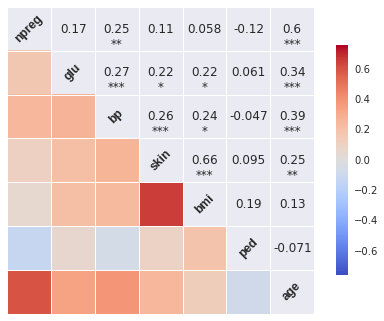

                     Generalized Linear Model Regression Results                     
Dep. Variable:     ['type[No]', 'type[Yes]']   No. Observations:                  200
Model:                                   GLM   Df Residuals:                      192
Model Family:                       Binomial   Df Model:                            7
Link Function:                         logit   Scale:                             1.0
Method:                                 IRLS   Log-Likelihood:                -89.195
Date:                       Thu, 07 Apr 2016   Deviance:                       178.39
Time:                               15:22:29   Pearson chi2:                     177.
No. Iterations:                            7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.7731      1.770      5.520      0.000         6.303

In [26]:
pimatr.data.groupby('type').mean()
pimatr.data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.corrplot(pimatr.data)
plt.show()
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula='type~npreg+glu+bp+skin+bmi+ped+age'

#Binomial로 모델링.
model=smf.glm(formula, data=pimatr.data,family=sm.families.Binomial()).fit()
print (model.summary())
#                     Generalized Linear Model Regression Results                     
#=====================================================================================
#Dep. Variable:     ['type[No]', 'type[Yes]']   No. Observations:                  200
#Model:                                   GLM   Df Residuals:                      192
#Model Family:                       Binomial   Df Model:                            7
#Link Function:                         logit   Scale:                             1.0
#Method:                                 IRLS   Log-Likelihood:                -89.195
#Date:                       Wed, 17 Dec 2014   Deviance:                       178.39
#Time:                               06:40:58   Pearson chi2:                     177.
#No. Iterations:                            6                                         
#==============================================================================
#                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
#------------------------------------------------------------------------------
#Intercept      9.7731      1.770      5.520      0.000         6.303    13.243
#npreg         -0.1032      0.065     -1.595      0.111        -0.230     0.024
#glu           -0.0321      0.007     -4.732      0.000        -0.045    -0.019
#bp             0.0048      0.019      0.257      0.797        -0.032     0.041
#skin           0.0019      0.022      0.085      0.932        -0.042     0.046
#bmi           -0.0836      0.043     -1.953      0.051        -0.168     0.000
#ped           -1.8204      0.666     -2.735      0.006        -3.125    -0.516
#age           -0.0412      0.022     -1.864      0.062        -0.084     0.002
#==============================================================================

#GLM모델의 결과
#종속변수가 이진적.
#Link Function은 logit

#유의적인 변인은 glu, ped. 이 두 변인으로 모델링해 보면; 
formula2='type~glu-npreg-bp-skin-bmi+ped-age'
model2=smf.glm(formula2,data=pimatr.data,family=sm.families.Binomial()).fit()
print #model2.summary()

#                     Generalized Linear Model Regression Results                     
#=====================================================================================
#Dep. Variable:     ['type[No]', 'type[Yes]']   No. Observations:                  200
#Model:                                   GLM   Df Residuals:                      197
#Model Family:                       Binomial   Df Model:                            2
#Link Function:                         logit   Scale:                             1.0
#Method:                                 IRLS   Log-Likelihood:                -99.630
#Date:                       Wed, 17 Dec 2014   Deviance:                       199.26
#Time:                               06:51:05   Pearson chi2:                     192.
#No. Iterations:                            6                                         
#==============================================================================
#                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
#------------------------------------------------------------------------------
#Intercept      6.4009      0.949      6.747      0.000         4.541     8.260
#glu           -0.0388      0.006     -5.988      0.000        -0.051    -0.026
#ped           -1.6352      0.601     -2.720      0.007        -2.813    -0.457
#==============================================================================

#model2.parmas
model2.params
#Intercept    6.400924
#glu         -0.038770
#ped         -1.635204


#OLS로 해보면 되긴 하는데 출력이 안되지???
#아마도 type이 이진변수라서
from statsmodels.formula.api import ols
model3=ols(formula,data=pimatr.data).fit()

## temp

In [2]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [8]:
type(diabetes.data)

numpy.ndarray

In [11]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [12]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [14]:
type(diabetes_X)

numpy.ndarray

In [ ]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [21]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [970.16723129]


In [22]:
regr.intercept_

0.0

In [17]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [19]:
np.linalg.lstsq(diabetes_X_train, diabetes_y_train)

/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([970.16723129]), array([11536167.22048419]), 1, array([0.97763907]))